<a href="https://colab.research.google.com/github/CHAITANDEV/python-/blob/main/Major_project_mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## I - Problem Statement

- **Given** - A Data Set of Fake and Real news.

- **Objective** - To develop a solution which  
  detects if a given news is Fake or Real.

- **Methodology used** - We try to pose the  problem as a text classification problem and build a BI LSTM AND NLP (Checking for other model) for achieving the objective.

#### Different Models 
While there multiple types of models which could be used for building the solution for Text Classification. Some Examples are - 


*   **1D- Conv Net** - 
Yes, CNNs could also be used for text. **Advantage**: They are faster to ttrain. In fact given proper label, a CNN model could achieve decent accuracy **Disdvantage**: They fail to capture long term dependencies in Text, and doesnt not capture sequential information in text.

*   **RNN based models (LSTM, GRU) ** -  **Advantage** : They focus on considering words T each time step, encoding them by some non-linear calculation and then taking a decision. In simple words, they can capture sequential nature of a Text. 
**Disadvantage** - Slower to train, focus is more on sequential nature, and less on attention mechanism.

* **Transformer based Models(BERT, GPT2)**- 
Transformer based models are a breaktrhough in NLP, and tend to model. Which leverages multiple Transformer units, and a multi-headed attention mechanism. The advantage is that they focus only on attention mechanism. Thus we obtain a model, which is can used in context heavy applications.

* **CNN or ConvNet, is a class of neural networks that specializes in processing data that has a grid-like topology, such as an image. A digital image is a binary representation of visual data. It contains a series of pixels arranged in a grid-like fashion that contains pixel values to denote how bright and what color each pixel should be. Image for refrence-(https://miro.medium.com/v2/resize:fit:4800/format:webp/1*kkyW7BR5FZJq4_oBTx3OPQ.png)





## II - StandAlone BERT Model -  

- For our solution we will be using BERT model to develop Fake News or Real News Classification Solution. 

- We achieved an accuracy of 95+ % on test set, and a remarkable AUC by a standalone BERT Model. More improvements could be done with better tuning, and training for longer time. In cloud settings like Google Cloud(with larger GPUs) or AWS infra. But improvement is a continuous process :)

- We build an MVP with BERT Stand-alone model

- We can Also use, BERT (as an embedder) + LSTM model to build this solution. 

![BERT Classfier](https://lh3.googleusercontent.com/proxy/L8T4cIs-Djtc99-Oi3wuMDxRB9WG-OCIh0rAlz3SB3w6zxYTLtVuxbUwuLlsCK0JUrMTa_QtN28N0HQvJsCvO1oIXZnFJFENSMPuEkxvtjY1N_jX)

Above figure shows the Kind of model we will be building in developing our solution.




## III - Coding Environment  

- I chose Google Colab for two reasons primarily - Firstly, To Document the process step by step. Seoncdly, other than this I wanted to leverage the free GPU available in Google Colab. 

- The avaialble GPU helped me train faster, compared to my own PC.(well, you might notice that even the the resource, got exhausted after 2 epochs, but we created a checkpoint to save the model)


- In production as well, GPU powered AWS    frameweorks such as AWS Sagemkaer and Google GPU cloud infra are useful in training models and deploying quicker. 

- For coding environment we can develop models
  using Keras or Tensorflow. Depending upon    
  the level of control we want on model 
  creation, we can work with that TF versions and utilities such as core, and functional APIs. 

- For more control and inner workings of     
  model, TF core comes is usually very useful, 
  and for quicker prototyping we can go for  
  Keras or  TF2.0 which is keras style.

- I chose to go with Tensorflow 2.0 for BERT TF.2.0 model for classification.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [42]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IV - Data Preprocessing and Exploration




### Loading Data

Our data are json files stored on web, therefore we download it and convert it into pandas dataframe

In [43]:
import urllib
import json

def load_convert_data(url):
    """
    Downloads the json file from net and convert into pandas dataframe format.
    """
    with urllib.request.urlopen(url) as url:
        df = json.loads(url.read().decode())
        df = pd.DataFrame.from_dict(df)
        
    return df

Given:

There are 4 files:
- training - set of real news. 
- testing - set of real news.
- training - set of fake news.
- testing - set of fake news

In [44]:
# Real news data
real_train = load_convert_data("https://storage.googleapis.com/public-resources/dataset/real_train.json")
real_test = load_convert_data("https://storage.googleapis.com/public-resources/dataset/real_test.json")

In [45]:
# Fake news data
fake_train = load_convert_data("https://storage.googleapis.com/public-resources/dataset/fake_train.json")
fake_test = load_convert_data("https://storage.googleapis.com/public-resources/dataset/fake_test.json")

In [46]:
# quick look on real news training data
real_train.head()

,url,title,text
0,https://www.thetimes.co.uk/edition/scotland/sc...,Scots GPs told not to meet fever patients as f...,Scots GPs told not to meet fever patients as f...
1,https://www.bbc.com/news/world-africa-52103799,Coronavirus : Fighting al - Shabab propaganda ...,Coronavirus: Fighting al-Shabab propaganda in ...
2,https://www.thetimes.co.uk/edition/business/en...,Engineer fears China virus impact,Engineer fears China virus impact\nA British e...
3,https://www.theguardian.com/world/live/2020/fe...,Coronavirus : South Korean PM vows swift act...,Here’s a summary of what’s happened so far on ...
4,https://yle.fi/uutiset/osasto/news/finnair_iss...,Finnair issues profit warning over Covid - 19 ...,Finnair issues profit warning over Covid-19 fe...


**Observation** : -

- We can see that there are 800 rows and 3 columns for real news in training set, we will only use the 'text' column for modeling (for simplicity sake). 

- In case if the model doesnt perform well, we can use multiple features like url as well.

- However, we acheived good performance by using text data alone.

In [47]:
# Quick look on Fake news training data
fake_train.head()

,url,title,text
0,https://nabd.com/s/71539812-b7228b/%D9%86%D8%B...,Online Facts New conspiracy theory: #Bel_Gates...,Roger Stone suggested on Monday that Bill Gate...
1,https://shamra.sy/news/article/8eb73454931e6d1...,Revolutionary Guards: Corona could be an Ameri...,Source\nRussia Today |\nIranian Revolutionary ...
2,https://sudanewsnow.com/19800/,Yellow skin is the host environment of the vir...,Sudan news now from all sources sudanewsnow.co...
3,https://arabic.rt.com/press/1100276-%D8%A7%D9%...,China and Russia are doing what the European U...,China and Russia are doing what the European U...
4,https://www.kachaf.com/details.php?n=5e8957fe1...,,Fatal error: Uncaught MongoDB\Driver\Exception...


**Observations** :- 
- Training set of Fake news contain also 800 rows.
- So we can see that the number of real news and fake news are same in our dataset.

- It won't be an imbalanced classification problem.

### General Data Preprocessing

Next we label our data where real news are labeled as 0 (negative) and fake news are labeled as 1 (positive). The reason we label fake news as positive is that the main purpose of the modeling is to detect fake news.

In [48]:
real_train['label'] = 0
real_test['label'] = 0
fake_train['label'] = 1
fake_test['label'] = 1

train = pd.concat([real_train, fake_train], ignore_index=True)
test = pd.concat([real_test, fake_test], ignore_index=True)

We then remove non alphanumeric characters as well as converting to all lower case from the text.

In [49]:
import re
def clean_txt(text):
    text = re.sub("'", "", text)
    text = re.sub("(\\W)+", " ", text)
    text = text.lower()
    return text

train['text'] = train['text'].apply(clean_txt)
test['text'] = test['text'].apply(clean_txt)

### Plotting Data

#### Word Count histogram

We use train set to perform exploratory analysis. First we want to look at the word count for each news and see if there is difference between real and fake news.





<ipython-input-50-1c6aec3d5046>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['word_count'][train['label'] == 0], kde=False, rug=False)


<Axes: xlabel='word_count'>

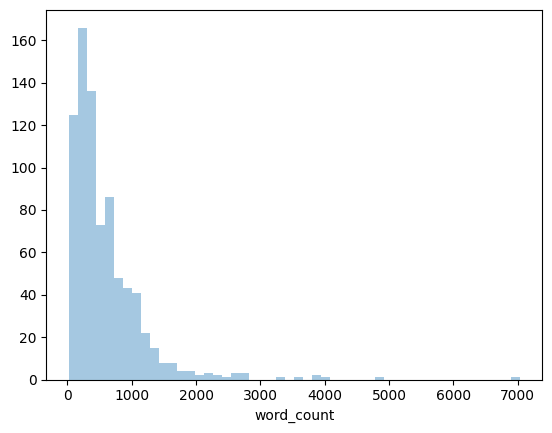

In [50]:
train['word_count'] = [len(s.split()) for s in train['text']]
#real 
sns.distplot(train['word_count'][train['label'] == 0], kde=False, rug=False)

We can see from the above graph that most real news are within 1000 words, and the distribution of word count is skewed to the right.

<ipython-input-51-7ec74753657b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['word_count'][train['label'] == 1], kde=False, rug=False)


<Axes: xlabel='word_count'>

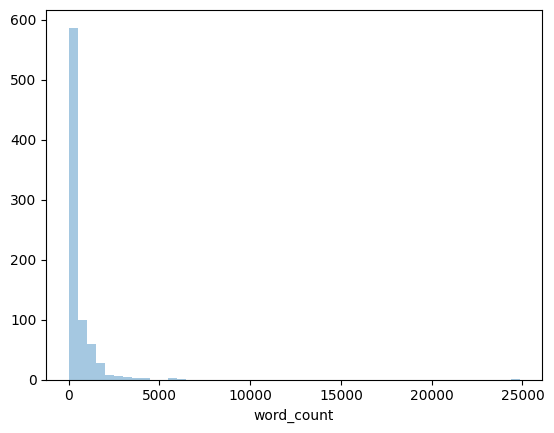

In [51]:
#fake 
sns.distplot(train['word_count'][train['label'] == 1], kde=False, rug=False)

As for the fake news, we see some outliers from above figure, making it hard to intepret, so we plot it again below with outlier (news that has more than 20,000 words) removed.

<ipython-input-52-d2d129250875>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['word_count'][(train['label'] == 1) & (train['word_count'] < 20000)], kde=False, rug=False)


<Axes: xlabel='word_count'>

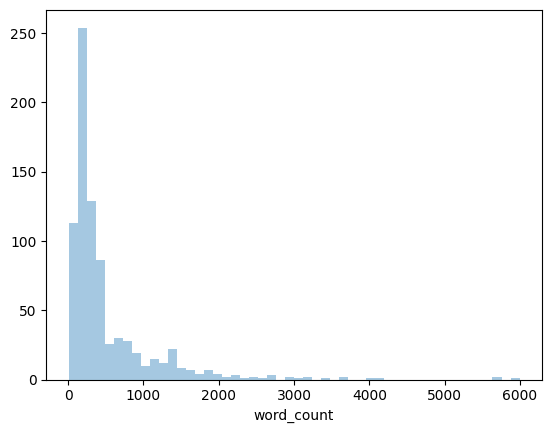

In [52]:
sns.distplot(train['word_count'][(train['label'] == 1) & (train['word_count'] < 20000)], kde=False, rug=False)

We can see the word count distribution of fake news are more skewed, most of the news have words below 500. 

#### Word Cloud

Next we like to see what are the most common words in real/fake news to discover some patterns. Word cloud is a popular way to visualize it.

In [53]:
from wordcloud import WordCloud

def plot_wordcloud(target,width = 800, height = 400):
    """
    Plot wordcloud of real/fake news
    
    target: real/fake
    width: the width of plotted figure
    height: the height of plotted figure
    """
    if target == 'real':
        t = 0
    elif target == 'fake':
        t = 1
    text = ''
    for t in train['text'][train['label'] == t]:
        text = text + t
    wordcloud = WordCloud(max_font_size=40, min_font_size=20, width=800, height = 400, random_state=0).generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

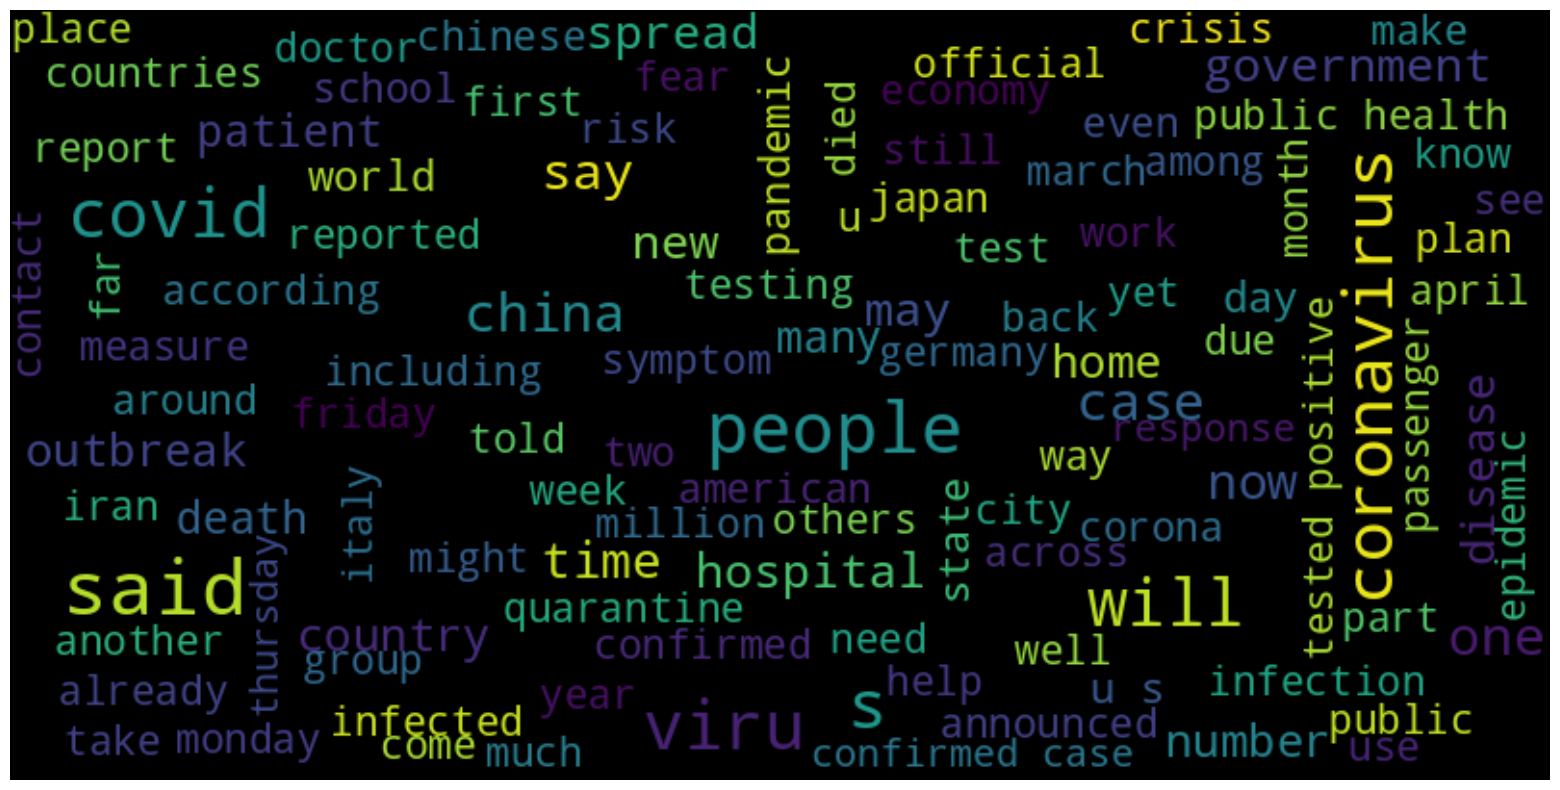

In [54]:
plot_wordcloud('real',width = 800, height = 400)

We can see most of the real news are about COVID19 virus, and the common words are countries name and some neutural words.

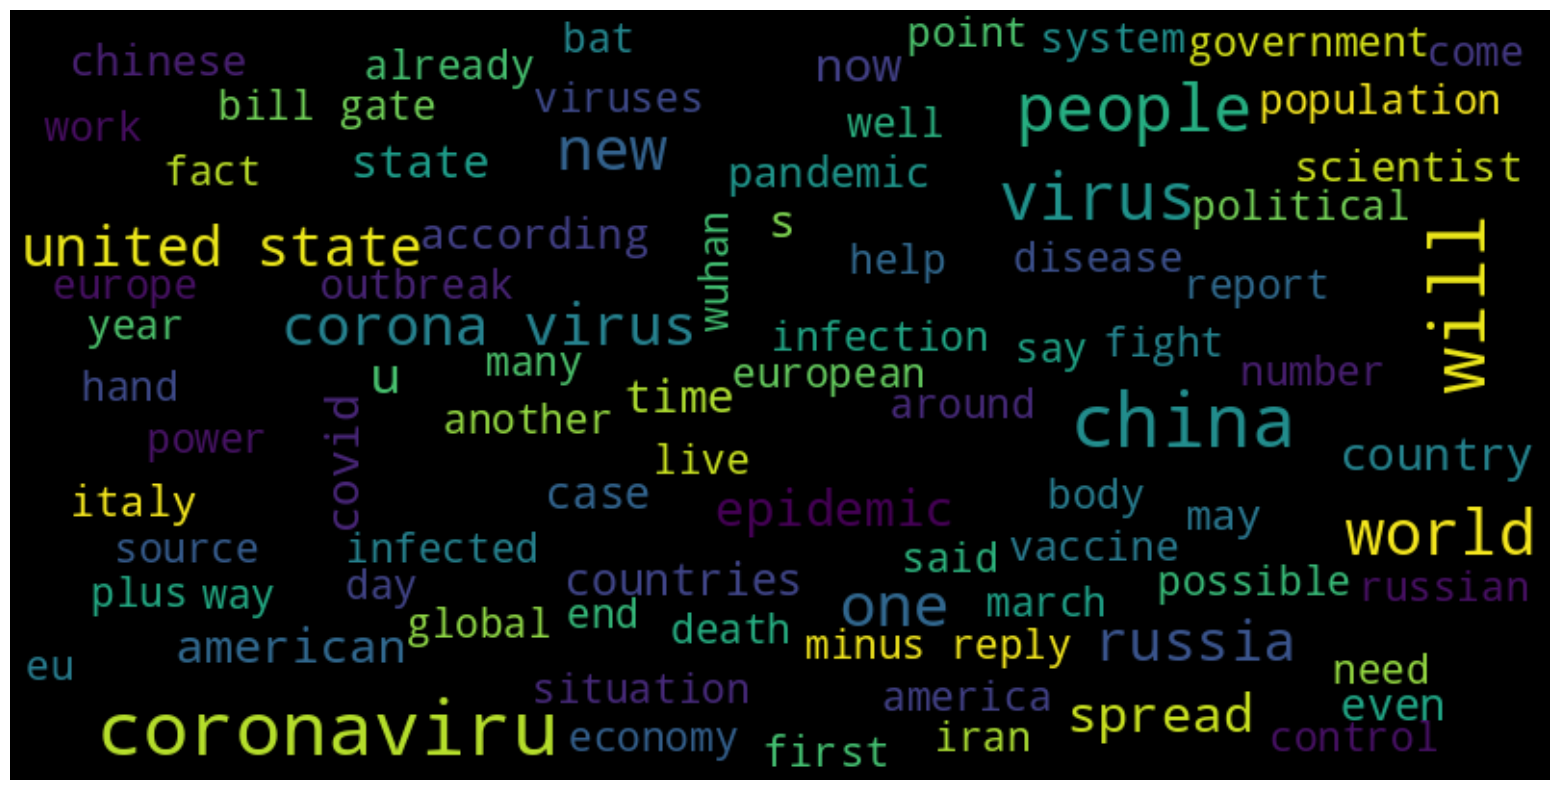

In [55]:
plot_wordcloud('fake',width = 800, height = 400)

As for fake news, the topic is also the same. However, it contain some strong words such as biological weapon, as well as some names such as Narendra modi and Amritpal singh.

#### TopK Word Proportion

Next we would like to see the topk word proportion of the real/fake news. In other words, we like to see how many of the words used in the news are from the top 10 common words, top 100, and so on. The reason to do so is that we suppose fake news are machine generated and it use many high frequency words comparing to real news.

In [56]:
# how many words in top 10, top 100, and top 1000
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

def concat_text(target):
    """
    Concat the news into one large document and split it into a list.
    """
    if target == 'real':
        t = 0
    elif target == 'fake':
        t = 1
        
    text = ''
    for t in train['text'][train['label'] == t]:
        text = text + t
    text = text.split(' ')

    return text

def most_frequent_words(text):
      """
      Calculate and order the vocab by its frequency.
      """
      ngram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), min_df=1)
      X = ngram_vectorizer.fit_transform(text)
      vocab = np.array(list(ngram_vectorizer.get_feature_names()))
      counts = np.array(X.sum(axis=0).A1)
      inds = counts.argsort()[::-1]
      ordered_vocab = vocab[inds]

      return ordered_vocab


In [57]:
def plot_topK_distribution(k1 = 10, k2 = 100, k3 = 1000):
    """
    Plot the comparison bar chart between real and fake news.

    k1: most common k1 words
    k2: most common k2 words
    k3: most common k3 words
    """
    real_text = concat_text('real')
    fake_text = concat_text('fake')

    real_vocab = most_frequent_words(real_text)
    fake_vocab = most_frequent_words(fake_text)
    
    x = ['top' + str(k1), 'top' + str(k2), 'top' + str(k3)] 
    label = ['real','real','real','fake','fake','fake']
    y = [np.mean([s in real_vocab[1:k1] for s in real_text]),
         np.mean([s in real_vocab[1:k2] for s in real_text]),
         np.mean([s in real_vocab[1:k3] for s in real_text]),
         np.mean([s in fake_vocab[1:k1] for s in fake_text]),
         np.mean([s in fake_vocab[1:k2] for s in fake_text]),
         np.mean([s in fake_vocab[1:k3] for s in fake_text])]

    df = pd.DataFrame(zip(x*2, label, y), columns=["Topk", "Label", "Proportion"])
    sns.barplot(x="Topk", hue="Label", y="Proportion", data=df)
    plt.show()

plot_topK_distribution(k1 = 10, k2 = 100, k3 = 1000)

AttributeError: ignored

However, we see that fake news are slightly more often to have top frequent words, but the difference is not significant.

# V -  Modeling
For this project, we use BERT as our modeling algorithm.

### Splitting Data to Train/Validation

First we like to split our training set into training and validation set with a ratio of 8:2, this way we can use the validation to tune our model, and finally predict on the hold out test set.

In [62]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train, test_size=0.2, random_state=35)

### Long Document Preprocessing

Since BERT algorithm can only accept sentence length up to 512 words, we need to preprocess our data (long news) in order to feed in to the algorithm. To do so, we follow the idea from [this paper](https://arxiv.org/abs/1910.10781) and segment each of the text into multiple subtext of no longer than 150 words. The subtexts will have some overlapping, specifically, the last 30 words for first subtext will be the first 30 words of the second subtext. 

In [63]:
def get_split(text):
    """
    Split each news text to subtexts no longer than 150 words.
    """
    l_total = []
    l_parcial = []
    if len(text.split())//120 >0:
        n = len(text.split())//120
    else: 
        n = 1
    for w in range(n):
        if w == 0:
            l_parcial = text.split()[:150]
            l_total.append(" ".join(l_parcial))
        else:
            l_parcial = text.split()[w*120:w*120 + 150]
            l_total.append(" ".join(l_parcial))
    return l_total

train['text_split'] = train['text'].apply(get_split)
val['text_split'] = val['text'].apply(get_split)
test['text_split'] = test['text'].apply(get_split)

In [64]:
train['text_split'][1]

['coronavirus fighting al shabab propaganda in somalia muslim clerics in conflict hit somalia are moving to the front line of the battle against coronavirus in a bid to counter the propaganda of militant islamists writes bbc somalia analyst mary harper the al qaeda linked al shabab group has warned muslims to beware of infectious diseases such as coronavirus which it says are spread by the crusader forces who have invaded the country and the disbelieving countries that support them the militants control much of southern and central somalia and have been a powerful force for well over a decade although there have only been a handful of confirmed cases of coronavirus in somalia so far the authorities are deeply worried that if the disease takes hold they will be unable to cope koranic schools shut about 30 years of conflict have devastated health facilities hundreds of thousands of displaced people',
 'that if the disease takes hold they will be unable to cope koranic schools shut about 

As we can see from above example, a piece of long document is splitted into list of multiple subtexts. Next, we augument our original data into a larger dataset where each row contains a piece of subtext and its corresponding label and index.

### Building BERT Model

In [60]:
!pip install bert-for-tf2
import math 
import os
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


First we like to load the pretrained weight of BERT and finetune it. The source of pretrained weights is called uncased_L-12_H-768_A-12. Since Because tf.train.load_checkpoint limitation requiring list permissions on the google storage bucket, we perform a tweak below to copy the pre-trained BERT weights locally.

In [59]:
%%time

bert_ckpt_dir="gs://bert_models/2018_10_18/uncased_L-12_H-768_A-12/"
bert_ckpt_file = bert_ckpt_dir + "bert_model.ckpt"
bert_config_file = bert_ckpt_dir + "bert_config.json"

bert_model_dir="2018_10_18"
bert_model_name="uncased_L-12_H-768_A-12"

!mkdir -p .model .model/$bert_model_name

for fname in ["bert_config.json", "vocab.txt", "bert_model.ckpt.meta", "bert_model.ckpt.index", "bert_model.ckpt.data-00000-of-00001"]:
  cmd = f"gsutil cp gs://bert_models/{bert_model_dir}/{bert_model_name}/{fname} .model/{bert_model_name}"
  !$cmd

!ls -la .model .model/$bert_model_name

bert_ckpt_dir = os.path.join(".model/",bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")

Copying gs://bert_models/2018_10_18/uncased_L-12_H-768_A-12/bert_config.json...
/ [1 files][  313.0 B/  313.0 B]                                                
Operation completed over 1 objects/313.0 B.                                      
Copying gs://bert_models/2018_10_18/uncased_L-12_H-768_A-12/vocab.txt...
/ [1 files][226.1 KiB/226.1 KiB]                                                
Operation completed over 1 objects/226.1 KiB.                                    
Copying gs://bert_models/2018_10_18/uncased_L-12_H-768_A-12/bert_model.ckpt.meta...
/ [1 files][883.0 KiB/883.0 KiB]                                                
Operation completed over 1 objects/883.0 KiB.                                    
Copying gs://bert_models/2018_10_18/uncased_L-12_H-768_A-12/bert_model.ckpt.index...
/ [1 files][  8.3 KiB/  8.3 KiB]                                                
Operation completed over 1 objects/8.3 KiB.                                      
Copying gs://bert_models/2

Next we preprocess our original text into input features BERT can read. The process is basically tokenizing and coverting our original text into token ids that can be read by the algorithm. The words are tokenized base on the vocabulary dictionary it pretrained on(about 30,000 words), and unknown words are breaken down into smaller words contained in the dictionary. Maximum sequence length are also specified so we can pad all sequence into the same length. 
Note: The final sequence length would be larger than specified since BERT tokenizer will break unknown words into multiple small known words.

* **Bi LSTMs, each training sequence is presented forward and backward so as to separate recurrent nets. Both sequences are connected to the same output layer. Bidirectional LSTMs have complete information about every point in a given sequence, everything before and after it. 

In [58]:
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "name": "Copy of deb house + pos NLPproject_6.ipynb",
      "version": "0.3.2",
      "provenance": [],
      "collapsed_sections": []
    },
    "kernelspec": {
      "name": "python2",
      "display_name": "Python 2"
    },
    "accelerator": "GPU"
  },
  "cells": [
    {
      "metadata": {
        "id": "EEODXnFvreGX",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        "import pandas as pd\n",
        "import os.path\n",
        "import cPickle \n",
        "import numpy as np\n",
        "import keras.utils\n",
        "import time\n",
        "from keras.callbacks import TensorBoard, CSVLogger\n",
        "from keras.preprocessing.text import text_to_word_sequence\n",
        "from keras.preprocessing import sequence\n",
        "from keras.preprocessing.text import Tokenizer\n",
        "from keras.models import Sequential\n",
        "from keras.layers import Dense,Flatten,LSTM,Conv1D,GlobalMaxPool1D,Dropout,Bidirectional\n",
        "from keras.layers.embeddings import Embedding\n",
        "from keras import optimizers\n",
        "from keras.layers import Input\n",
        "from keras.models import Model\n",
        "from keras.utils.vis_utils import plot_model\n",
        "from IPython.display import SVG\n",
        "from keras.utils.vis_utils import model_to_dot\n",
        "from keras.models import load_model\n",
        "from nltk.corpus import stopwords\n",
        "import operator"
      ],
      "execution_count": 0,
      "outputs": []
    },
    {
      "metadata": {
        "id": "TgI7FLO_wlnu",
        "colab_type": "code",
        "outputId": "bddba940-675e-4626-cc88-7b6ecdfe0228",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 67
        }
      },
      "cell_type": "code",
      "source": [
        "import nltk\n",
        "nltk.download('stopwords')"
      ],
      "execution_count": 34,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "[nltk_data] Downloading package stopwords to /root/nltk_data...\n",
            "[nltk_data]   Package stopwords is already up-to-date!\n"
          ],
          "name": "stdout"
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "True"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 34
        }
      ]
    },
    {
      "metadata": {
        "id": "a4P39BFeeCoX",
        "colab_type": "code",
        "outputId": "22a27f2b-c894-4b2f-ffa1-e0ce10d58da5",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 171
        }
      },
      "cell_type": "code",
      "source": [
        "import spacy\n",
        "!python -m spacy download en\n",
        "nlp = spacy.load('en')"
      ],
      "execution_count": 35,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "Requirement already satisfied: en_core_web_sm==2.0.0 from https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.0.0/en_core_web_sm-2.0.0.tar.gz#egg=en_core_web_sm==2.0.0 in /usr/local/lib/python2.7/dist-packages (2.0.0)\n",
            "\n",
            "\u001b[93m    Linking successful\u001b[0m\n",
            "    /usr/local/lib/python2.7/dist-packages/en_core_web_sm -->\n",
            "    /usr/local/lib/python2.7/dist-packages/spacy/data/en\n",
            "\n",
            "    You can now load the model via spacy.load('en')\n",
            "\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "0IbrSuMSPIKu",
        "colab_type": "code",
        "outputId": "fcb79883-76c2-46e6-a247-56408d336a10",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 34
        }
      },
      "cell_type": "code",
      "source": [
        "pd.options.display.max_rows\n",
        "pd.set_option('display.max_colwidth', -1)\n",
        "from keras import backend as K\n",
        "K.tensorflow_backend._get_available_gpus()"
      ],
      "execution_count": 36,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "['/job:localhost/replica:0/task:0/device:GPU:0']"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 36
        }
      ]
    },
    {
      "metadata": {
        "id": "_KrkewVdxA5M",
        "colab_type": "code",
        "outputId": "886ea0d0-e96f-4489-8c1a-9424020cc346",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 50
        }
      },
      "cell_type": "code",
      "source": [
        "!pip install pydot==1.2.3"
      ],
      "execution_count": 37,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "Requirement already satisfied: pydot==1.2.3 in /usr/local/lib/python2.7/dist-packages (1.2.3)\n",
            "Requirement already satisfied: pyparsing>=2.1.4 in /usr/local/lib/python2.7/dist-packages (from pydot==1.2.3) (2.3.0)\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "Q0aRemmeslZL",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        "train_data = pd.read_table('train.tsv', names = [\"id\", \"label\", \"statement\", \"subject\", \"speaker\", \"job\", \"state\", \"party\",\n",
        "                                            \"barely-true\", \"false\", \"half-true\", \"mostly-true\", \"pants-fire\", \"venue\"])\n",
        "\n",
        "val_data = pd.read_table('valid.tsv', names = [\"id\", \"label\", \"statement\", \"subject\", \"speaker\", \"job\", \"state\", \"party\",\n",
        "                                            \"barely-true\", \"false\", \"half-true\", \"mostly-true\", \"pants-fire\", \"venue\"])\n",
        "\n",
        "test_data = pd.read_table('test.tsv', names = [\"id\", \"label\", \"statement\", \"subject\", \"speaker\", \"job\", \"state\", \"party\",\n",
        "                                            \"barely-true\", \"false\", \"half-true\", \"mostly-true\", \"pants-fire\", \"venue\"])\n"
      ],
      "execution_count": 0,
      "outputs": []
    },
    {
      "metadata": {
        "id": "E3jN_E6n0chj",
        "colab_type": "code",
        "outputId": "f1806572-6fee-4685-863d-bb1fc7c7d2ab",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 837
        }
      },
      "cell_type": "code",
      "source": [
        "print train_data.shape, val_data.shape, test_data.shape\n",
        "print train_data.label.unique()\n",
        "train_data.head()"
      ],
      "execution_count": 39,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "(10240, 14) (1284, 14) (1267, 14)\n",
            "['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']\n"
          ],
          "name": "stdout"
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "<div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>id</th>\n",
              "      <th>label</th>\n",
              "      <th>statement</th>\n",
              "      <th>subject</th>\n",
              "      <th>speaker</th>\n",
              "      <th>job</th>\n",
              "      <th>state</th>\n",
              "      <th>party</th>\n",
              "      <th>barely-true</th>\n",
              "      <th>false</th>\n",
              "      <th>half-true</th>\n",
              "      <th>mostly-true</th>\n",
              "      <th>pants-fire</th>\n",
              "      <th>venue</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>2635.json</td>\n",
              "      <td>false</td>\n",
              "      <td>Says the Annies List political group supports third-trimester abortions on demand.</td>\n",
              "      <td>abortion</td>\n",
              "      <td>dwayne-bohac</td>\n",
              "      <td>State representative</td>\n",
              "      <td>Texas</td>\n",
              "      <td>republican</td>\n",
              "      <td>0.0</td>\n",
              "      <td>1.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>a mailer</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>10540.json</td>\n",
              "      <td>half-true</td>\n",
              "      <td>When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.</td>\n",
              "      <td>energy,history,job-accomplishments</td>\n",
              "      <td>scott-surovell</td>\n",
              "      <td>State delegate</td>\n",
              "      <td>Virginia</td>\n",
              "      <td>democrat</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>1.0</td>\n",
              "      <td>1.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>a floor speech.</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>324.json</td>\n",
              "      <td>mostly-true</td>\n",
              "      <td>Hillary Clinton agrees with John McCain \"by voting to give George Bush the benefit of the doubt on Iran.\"</td>\n",
              "      <td>foreign-policy</td>\n",
              "      <td>barack-obama</td>\n",
              "      <td>President</td>\n",
              "      <td>Illinois</td>\n",
              "      <td>democrat</td>\n",
              "      <td>70.0</td>\n",
              "      <td>71.0</td>\n",
              "      <td>160.0</td>\n",
              "      <td>163.0</td>\n",
              "      <td>9.0</td>\n",
              "      <td>Denver</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>1123.json</td>\n",
              "      <td>false</td>\n",
              "      <td>Health care reform legislation is likely to mandate free sex change surgeries.</td>\n",
              "      <td>health-care</td>\n",
              "      <td>blog-posting</td>\n",
              "      <td>NaN</td>\n",
              "      <td>NaN</td>\n",
              "      <td>none</td>\n",
              "      <td>7.0</td>\n",
              "      <td>19.0</td>\n",
              "      <td>3.0</td>\n",
              "      <td>5.0</td>\n",
              "      <td>44.0</td>\n",
              "      <td>a news release</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>9028.json</td>\n",
              "      <td>half-true</td>\n",
              "      <td>The economic turnaround started at the end of my term.</td>\n",
              "      <td>economy,jobs</td>\n",
              "      <td>charlie-crist</td>\n",
              "      <td>NaN</td>\n",
              "      <td>Florida</td>\n",
              "      <td>democrat</td>\n",
              "      <td>15.0</td>\n",
              "      <td>9.0</td>\n",
              "      <td>20.0</td>\n",
              "      <td>19.0</td>\n",
              "      <td>2.0</td>\n",
              "      <td>an interview on CNN</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "</div>"
            ],
            "text/plain": [
              "           id        label  \\\n",
              "0  2635.json   false         \n",
              "1  10540.json  half-true     \n",
              "2  324.json    mostly-true   \n",
              "3  1123.json   false         \n",
              "4  9028.json   half-true     \n",
              "\n",
              "                                                                                                                                       statement  \\\n",
              "0  Says the Annies List political group supports third-trimester abortions on demand.                                                              \n",
              "1  When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.   \n",
              "2  Hillary Clinton agrees with John McCain \"by voting to give George Bush the benefit of the doubt on Iran.\"                                       \n",
              "3  Health care reform legislation is likely to mandate free sex change surgeries.                                                                  \n",
              "4  The economic turnaround started at the end of my term.                                                                                          \n",
              "\n",
              "                              subject         speaker                   job  \\\n",
              "0  abortion                            dwayne-bohac    State representative   \n",
              "1  energy,history,job-accomplishments  scott-surovell  State delegate         \n",
              "2  foreign-policy                      barack-obama    President              \n",
              "3  health-care                         blog-posting    NaN                    \n",
              "4  economy,jobs                        charlie-crist   NaN                    \n",
              "\n",
              "      state       party  barely-true  false  half-true  mostly-true  \\\n",
              "0  Texas     republican  0.0          1.0    0.0        0.0           \n",
              "1  Virginia  democrat    0.0          0.0    1.0        1.0           \n",
              "2  Illinois  democrat    70.0         71.0   160.0      163.0         \n",
              "3  NaN       none        7.0          19.0   3.0        5.0           \n",
              "4  Florida   democrat    15.0         9.0    20.0       19.0          \n",
              "\n",
              "   pants-fire                venue  \n",
              "0  0.0         a mailer             \n",
              "1  0.0         a floor speech.      \n",
              "2  9.0         Denver               \n",
              "3  44.0        a news release       \n",
              "4  2.0         an interview on CNN  "
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 39
        }
      ]
    },
    {
      "metadata": {
        "id": "nDec1KQ22cwb",
        "colab_type": "code",
        "outputId": "d6ea73ee-3a40-480f-8c4b-2a471e2650a6",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 1025
        }
      },
      "cell_type": "code",
      "source": [
        "print train_data.info()\n",
        "print val_data.info()\n",
        "print test_data.info()"
      ],
      "execution_count": 40,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "<class 'pandas.core.frame.DataFrame'>\n",
            "RangeIndex: 10240 entries, 0 to 10239\n",
            "Data columns (total 14 columns):\n",
            "id             10240 non-null object\n",
            "label          10240 non-null object\n",
            "statement      10240 non-null object\n",
            "subject        10238 non-null object\n",
            "speaker        10238 non-null object\n",
            "job            7343 non-null object\n",
            "state          8032 non-null object\n",
            "party          10238 non-null object\n",
            "barely-true    10238 non-null float64\n",
            "false          10238 non-null float64\n",
            "half-true      10238 non-null float64\n",
            "mostly-true    10238 non-null float64\n",
            "pants-fire     10238 non-null float64\n",
            "venue          10138 non-null object\n",
            "dtypes: float64(5), object(9)\n",
            "memory usage: 1.1+ MB\n",
            "None\n",
            "<class 'pandas.core.frame.DataFrame'>\n",
            "RangeIndex: 1284 entries, 0 to 1283\n",
            "Data columns (total 14 columns):\n",
            "id             1284 non-null object\n",
            "label          1284 non-null object\n",
            "statement      1284 non-null object\n",
            "subject        1284 non-null object\n",
            "speaker        1284 non-null object\n",
            "job            939 non-null object\n",
            "state          1005 non-null object\n",
            "party          1284 non-null object\n",
            "barely-true    1284 non-null int64\n",
            "false          1284 non-null int64\n",
            "half-true      1284 non-null int64\n",
            "mostly-true    1284 non-null int64\n",
            "pants-fire     1284 non-null int64\n",
            "venue          1272 non-null object\n",
            "dtypes: int64(5), object(9)\n",
            "memory usage: 140.5+ KB\n",
            "None\n",
            "<class 'pandas.core.frame.DataFrame'>\n",
            "RangeIndex: 1267 entries, 0 to 1266\n",
            "Data columns (total 14 columns):\n",
            "id             1267 non-null object\n",
            "label          1267 non-null object\n",
            "statement      1267 non-null object\n",
            "subject        1267 non-null object\n",
            "speaker        1267 non-null object\n",
            "job            942 non-null object\n",
            "state          1005 non-null object\n",
            "party          1267 non-null object\n",
            "barely-true    1267 non-null int64\n",
            "false          1267 non-null int64\n",
            "half-true      1267 non-null int64\n",
            "mostly-true    1267 non-null int64\n",
            "pants-fire     1267 non-null int64\n",
            "venue          1250 non-null object\n",
            "dtypes: int64(5), object(9)\n",
            "memory usage: 138.6+ KB\n",
            "None\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "z44vhifU0HHi",
        "colab_type": "code",
        "outputId": "246ae442-6afd-4844-a157-a4eb6680bff9",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 34
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "### OUTPUT LABELS ###\n",
        "#####################\n",
        "\n",
        "y_label_dict = {\"pants-fire\" : 0, \"false\" : 1, \"barely-true\" : 2, \"half-true\" : 3, \"mostly-true\" : 4, \"true\" : 5}\n",
        "print y_label_dict\n",
        "\n",
        "train_data['output'] = train_data['label'].apply(lambda x: y_label_dict[x])\n",
        "val_data['output'] = val_data['label'].apply(lambda x: y_label_dict[x])\n",
        "test_data['output'] = test_data['label'].apply(lambda x: y_label_dict[x])\n",
        "\n",
        "num_classes = 6"
      ],
      "execution_count": 41,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "{'false': 1, 'half-true': 3, 'mostly-true': 4, 'pants-fire': 0, 'true': 5, 'barely-true': 2}\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "CN80sxfT3WVt",
        "colab_type": "code",
        "outputId": "d360ee50-e7d5-4f33-f475-7438bbcc0464",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 390
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###   SPEAKERS    ###\n",
        "#####################\n",
        "\n",
        "#frequent_speakers = train_data['speaker'].value_counts()[:20].reset_index().to_dict()['index']\n",
        "#frequent_speakers = dict((v,k) for k,v in frequent_speakers.iteritems())\n",
        "frequent_speakers = {'barack-obama' : 0, 'donald-trump' : 1, 'hillary-clinton' : 2, \n",
        "                     'mitt-romney' : 3, 'scott-walker' : 4, 'john-mccain' : 5, \n",
        "                     'rick-perry' : 6, 'chain-email' : 7, 'marco-rubio' : 8, 'viral-image':13,\n",
        "                     'rick-scott' : 9, 'ted-cruz' : 10, 'bernie-s' : 11, 'newt-gingrich':16,\n",
        "                     'chris-christie' : 12, 'facebook-posts' : 13,'blog-posting':13, \n",
        "                     'charlie-crist' : 14, 'congressional' : 15, 'republican' : 15, \n",
        "                     'national-committe' : 15, 'democratic':15}\n",
        "\n",
        "print frequent_speakers\n",
        "\n",
        "def get_speaker_id(speaker):\n",
        "  if isinstance(speaker, str):\n",
        "    matched = [sp for sp in frequent_speakers if sp in speaker.lower() ]\n",
        "    if len(matched)>0:\n",
        "      return frequent_speakers[matched[0]]\n",
        "    else:\n",
        "      return len(set(frequent_speakers.values())) \n",
        "  else:\n",
        "    return len(set(frequent_speakers.values())) \n",
        "  \n",
        "\n",
        "train_data['speaker_id'] = train_data['speaker'].apply(get_speaker_id)\n",
        "val_data['speaker_id'] = val_data['speaker'].apply(get_speaker_id)\n",
        "test_data['speaker_id'] = test_data['speaker'].apply(get_speaker_id)\n",
        "\n",
        "print len(set(frequent_speakers.values())) \n",
        "\n",
        "train_data['speaker_id'].value_counts()"
      ],
      "execution_count": 42,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "{'chain-email': 7, 'hillary-clinton': 2, 'john-mccain': 5, 'scott-walker': 4, 'rick-scott': 9, 'ted-cruz': 10, 'marco-rubio': 8, 'mitt-romney': 3, 'facebook-posts': 13, 'barack-obama': 0, 'donald-trump': 1, 'congressional': 15, 'newt-gingrich': 16, 'rick-perry': 6, 'blog-posting': 13, 'republican': 15, 'national-committe': 15, 'viral-image': 13, 'bernie-s': 11, 'chris-christie': 12, 'charlie-crist': 14, 'democratic': 15}\n",
            "17\n"
          ],
          "name": "stdout"
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "17    7348\n",
              "0     488 \n",
              "15    347 \n",
              "1     275 \n",
              "2     239 \n",
              "3     176 \n",
              "13    156 \n",
              "4     149 \n",
              "5     148 \n",
              "6     142 \n",
              "7     142 \n",
              "8     117 \n",
              "9     115 \n",
              "10    93  \n",
              "11    88  \n",
              "12    78  \n",
              "14    70  \n",
              "16    69  \n",
              "Name: speaker_id, dtype: int64"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 42
        }
      ]
    },
    {
      "metadata": {
        "id": "PnMqv3FV4W89",
        "colab_type": "code",
        "outputId": "3660d2fa-bfb9-4c2b-9ddb-2c588be55b5a",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 306
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###   JOB TITLE   ###\n",
        "#####################\n",
        "\n",
        "#frequent_jobs = train_data['job'].str.lower().value_counts()[:20].reset_index().to_dict()['index']\n",
        "#frequent_jobs = dict((v,k) for k,v in frequent_jobs.iteritems())\n",
        "frequent_jobs = { 'senator' : 0, 'president' : 1, 'governor' : 2, \n",
        "                 'u.s. representative' : 3, 'attorney' : 4, 'congressman' : 5, \n",
        "                 'congresswoman' : 5, 'social media posting' : 6, 'lawyer' : 4, \n",
        "                 'businessman' : 6,  'radio host' : 8, 'host':8,\n",
        "                  'mayor' : 7, 'assembly' : 9,'representative' : 3, \n",
        "                 'senate' : 9,'state representative' : 10,'milwaukee county executive' : 11,\n",
        "                 'u.s. house of representatives' : 3,'house representative' : 3,\n",
        "                 'house of representatives' : 3,'house member':3}\n",
        "\n",
        "\n",
        "print frequent_jobs\n",
        "\n",
        "def get_job_id(job):\n",
        "  if isinstance(job, str):\n",
        "    matched = [jb for jb in frequent_jobs if jb in job.lower() ]\n",
        "    if len(matched)>0:\n",
        "      return frequent_jobs[matched[0]]\n",
        "    else:\n",
        "      return len(set(frequent_jobs.values()))\n",
        "  else:\n",
        "    return len(set(frequent_jobs.values()))\n",
        "  \n",
        "\n",
        "train_data['job_id'] = train_data['job'].apply(get_job_id)\n",
        "val_data['job_id'] = val_data['job'].apply(get_job_id)\n",
        "test_data['job_id'] = test_data['job'].apply(get_job_id)\n",
        "\n",
        "print len(set(frequent_jobs.values()))\n",
        "\n",
        "train_data['job_id'].value_counts()\n"
      ],
      "execution_count": 43,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "{'u.s. representative': 3, 'senate': 9, 'radio host': 8, 'attorney': 4, 'lawyer': 4, 'senator': 0, 'mayor': 7, 'state representative': 10, 'house representative': 3, 'house of representatives': 3, 'social media posting': 6, 'assembly': 9, 'u.s. house of representatives': 3, 'host': 8, 'representative': 3, 'house member': 3, 'businessman': 6, 'president': 1, 'congresswoman': 5, 'milwaukee county executive': 11, 'governor': 2, 'congressman': 5}\n",
            "12\n"
          ],
          "name": "stdout"
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "12    4597\n",
              "1     1205\n",
              "0     1201\n",
              "2     892 \n",
              "3     722 \n",
              "8     279 \n",
              "9     260 \n",
              "5     223 \n",
              "4     223 \n",
              "10    198 \n",
              "7     167 \n",
              "11    149 \n",
              "6     124 \n",
              "Name: job_id, dtype: int64"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 43
        }
      ]
    },
    {
      "metadata": {
        "id": "G9AgBXHmEPVk",
        "colab_type": "code",
        "outputId": "bc2eaeaa-b9cc-4985-b349-a34fdb613dbf",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 168
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###     PARTY     ###\n",
        "#####################\n",
        "frequent_parties = train_data['party'].str.lower().value_counts()[:5].reset_index().to_dict()['index']\n",
        "frequent_parties = dict((v,k) for k,v in frequent_parties.iteritems())\n",
        "print frequent_parties\n",
        "#frequent_parties['columnist']=frequent_parties['journalist']\n",
        "#frequent_parties['talk-show-host']=frequent_parties['journalist']\n",
        "def get_party_id(party):\n",
        "  if isinstance(party, str):\n",
        "    matched = [pt for pt in frequent_parties if pt in party.lower() ]\n",
        "    if len(matched)>0:\n",
        "      return frequent_parties[matched[0]]\n",
        "    else:\n",
        "      return len(set(frequent_parties.values())) \n",
        "  else:\n",
        "    return len(set(frequent_parties.values())) \n",
        "  \n",
        "\n",
        "train_data['party_id'] = train_data['party'].apply(get_party_id)\n",
        "val_data['party_id'] = val_data['party'].apply(get_party_id)\n",
        "test_data['party_id'] = test_data['party'].apply(get_party_id)\n",
        "\n",
        "print len(set(frequent_parties.values())) \n",
        "\n",
        "train_data['party_id'].value_counts()"
      ],
      "execution_count": 44,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "{'organization': 3, 'none': 2, 'republican': 0, 'democrat': 1, 'independent': 4}\n",
            "5\n"
          ],
          "name": "stdout"
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "0    4497\n",
              "1    3337\n",
              "2    1744\n",
              "5    296 \n",
              "3    219 \n",
              "4    147 \n",
              "Name: party_id, dtype: int64"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 44
        }
      ]
    },
    {
      "metadata": {
        "id": "P_UFk0g0rmt3",
        "colab_type": "code",
        "outputId": "5dce61a4-6811-4c12-e907-facc14210d1e",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 34
        }
      },
      "cell_type": "code",
      "source": [
        "train_data.loc[train_data['party_id']==9]['party'].value_counts()[:90]"
      ],
      "execution_count": 45,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "Series([], Name: party, dtype: int64)"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 45
        }
      ]
    },
    {
      "metadata": {
        "id": "1h5OER7xEpwE",
        "colab_type": "code",
        "outputId": "d5726162-1f12-4d12-9e30-6623efbb248e",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 373
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###     STATE     ###\n",
        "#####################\n",
        "#states_50 = ['Alabama','Alaska','Arizona','Arkansas','California',\n",
        "#                   'Colorado', 'Connecticut','Delaware','Florida', 'Georgia',\n",
        "#                   'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas',\n",
        "#                   'Kentucky','Louisiana','Maine','Maryland','Massachusetts',\n",
        "#                   'Michigan','Minnesota','Mississippi', 'Missouri','Montana',\n",
        "#                   'Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',\n",
        "#                   'New York','North Carolina','North Dakota','Ohio','Oklahoma',\n",
        "#                   'Oregon','Pennsylvania','Rhode Island','South Carolina',\n",
        "#                   'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia',\n",
        "#                   'Washington','West Virginia','Wisconsin','Wyoming']\n",
        "\n",
        "# frequent_states = dict((v.lower(),k) for k,v in enumerate(states_50))\n",
        "\n",
        "other_states = ['wyoming', 'colorado', 'hawaii', 'tennessee', 'nevada', 'maine',\n",
        "                'north dakota', 'mississippi', 'south dakota', 'oklahoma', \n",
        "                'delaware', 'minnesota', 'north carolina', 'arkansas', 'indiana', \n",
        "                'maryland', 'louisiana', 'idaho', 'iowa', 'west virginia', \n",
        "                'michigan', 'kansas', 'utah', 'connecticut', 'montana', 'vermont', \n",
        "                'pennsylvania', 'alaska', 'kentucky', 'nebraska', 'new hampshire', \n",
        "                'missouri', 'south carolina', 'alabama', 'new mexico']\n",
        "\n",
        "\n",
        "frequent_states = {'texas': 1, 'florida': 2, 'wisconsin': 3, 'new york': 4, \n",
        "                    'illinois': 5, 'ohio': 6, 'georgia': 7, 'virginia': 8, \n",
        "                   'rhode island': 9, 'oregon': 10, 'new jersey': 11, \n",
        "                   'massachusetts': 12, 'arizona': 13, 'california': 14, \n",
        "                   'washington': 15}\n",
        "for state in other_states:\n",
        "  frequent_states[state]=0\n",
        "\n",
        "print frequent_states\n",
        "\n",
        "def get_state_id(state):\n",
        "    if isinstance(state, basestring):\n",
        "        if state.lower().rstrip() in frequent_states:\n",
        "            return frequent_states[state.lower().rstrip()]\n",
        "        else:\n",
        "            if 'washington' in state.lower():\n",
        "                return frequent_states['washington']\n",
        "            else:\n",
        "                return len(set(frequent_states.values()))\n",
        "    else:\n",
        "        return len(set(frequent_states.values()))\n",
        "\n",
        "\n",
        "train_data['state_id'] = train_data['state'].apply(get_state_id)\n",
        "val_data['state_id'] = val_data['state'].apply(get_state_id)\n",
        "test_data['state_id'] = test_data['state'].apply(get_state_id)\n",
        "\n",
        "print len(set(frequent_states.values()))\n",
        "\n",
        "train_data['state_id'].value_counts()\n"
      ],
      "execution_count": 46,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "{'colorado': 0, 'washington': 15, 'rhode island': 9, 'tennessee': 0, 'nevada': 0, 'maine': 0, 'mississippi': 0, 'south dakota': 0, 'new jersey': 11, 'wyoming': 0, 'minnesota': 0, 'north carolina': 0, 'new york': 4, 'indiana': 0, 'maryland': 0, 'louisiana': 0, 'texas': 1, 'iowa': 0, 'michigan': 0, 'utah': 0, 'virginia': 8, 'oregon': 10, 'connecticut': 0, 'georgia': 7, 'hawaii': 0, 'kentucky': 0, 'nebraska': 0, 'new hampshire': 0, 'missouri': 0, 'south carolina': 0, 'ohio': 6, 'north dakota': 0, 'oklahoma': 0, 'delaware': 0, 'illinois': 5, 'arkansas': 0, 'idaho': 0, 'arizona': 13, 'wisconsin': 3, 'kansas': 0, 'montana': 0, 'california': 14, 'massachusetts': 12, 'vermont': 0, 'pennsylvania': 0, 'florida': 2, 'alaska': 0, 'west virginia': 0, 'alabama': 0, 'new mexico': 0}\n",
            "16\n"
          ],
          "name": "stdout"
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "16    2238\n",
              "0     1211\n",
              "1     1009\n",
              "2     1003\n",
              "3     714 \n",
              "4     659 \n",
              "5     558 \n",
              "6     448 \n",
              "7     433 \n",
              "8     408 \n",
              "9     371 \n",
              "10    242 \n",
              "11    241 \n",
              "12    212 \n",
              "13    182 \n",
              "14    163 \n",
              "15    148 \n",
              "Name: state_id, dtype: int64"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 46
        }
      ]
    },
    {
      "metadata": {
        "id": "JfzKHcECK8Ny",
        "colab_type": "code",
        "outputId": "7f680011-22ba-4f3b-d5d7-b5f00d833552",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 339
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###    SUBJECT    ###\n",
        "#####################\n",
        "frequent_subjects = train_data['subject'].str.lower().value_counts()[:25]\n",
        "\n",
        "# health-care               381\n",
        "# taxes                     308\n",
        "# immigration               253\n",
        "# elections                 252\n",
        "# education                 237\n",
        "# candidates-biography      190\n",
        "# economy                   137\n",
        "# guns                      130\n",
        "# economy,jobs              125\n",
        "# federal-budget            121\n",
        "# jobs                       98\n",
        "# energy                     94\n",
        "# abortion                   92\n",
        "# foreign-policy             85\n",
        "# state-budget               75\n",
        "# education,state-budget     69\n",
        "# transportation             64\n",
        "# crime                      59\n",
        "# ethics                     58\n",
        "# iraq                       55\n",
        "# campaign-finance           53\n",
        "# terrorism                  53\n",
        "# environment                52\n",
        "# history                    45\n",
        "# job-accomplishments        45\n",
        "\n",
        "frequent_subjects = {'health': 0, 'tax': 1, 'immigration': 2, 'election': 3, \n",
        "                     'education': 4, 'candidates-biography': 5, 'economy': 6, \n",
        "                     'gun': 7, 'job': 8, 'federal-budget': 6, 'energy': 9, \n",
        "                     'abortion': 10, 'foreign-policy': 6, 'state-budget': 6, \n",
        "                     'crime': 11, 'gays-and-lesbians' : 12, 'medicare' : 0, \n",
        "                     'terrorism' : 11, 'finance' : 6, 'criminal':11,\n",
        "                     'transportation':13}\n",
        "\n",
        "print frequent_subjects\n",
        "\n",
        "\n",
        "def get_subject_id(subject):\n",
        "  if isinstance(subject, str):\n",
        "    matched = [sbj for sbj in frequent_subjects if sbj in subject.lower() ]\n",
        "    if len(matched)>0:\n",
        "      return frequent_subjects[matched[0]]\n",
        "    else:\n",
        "      return len(set(frequent_subjects.values())) \n",
        "  else:\n",
        "    return len(set(frequent_subjects.values()))\n",
        "  \n",
        "\n",
        "train_data['subject_id'] = train_data['subject'].apply(get_subject_id)\n",
        "val_data['subject_id'] = val_data['subject'].apply(get_subject_id)\n",
        "test_data['subject_id'] = test_data['subject'].apply(get_subject_id)\n",
        "\n",
        "print len(set(frequent_subjects.values()))\n",
        "\n",
        "train_data['subject_id'].value_counts()\n",
        "\n",
        "#print train_data.loc[train_data['subject_id']==15]['subject'].value_counts()"
      ],
      "execution_count": 47,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "{'foreign-policy': 6, 'criminal': 11, 'transportation': 13, 'federal-budget': 6, 'crime': 11, 'abortion': 10, 'energy': 9, 'tax': 1, 'immigration': 2, 'candidates-biography': 5, 'gun': 7, 'job': 8, 'health': 0, 'election': 3, 'state-budget': 6, 'finance': 6, 'medicare': 0, 'terrorism': 11, 'education': 4, 'gays-and-lesbians': 12, 'economy': 6}\n",
            "14\n"
          ],
          "name": "stdout"
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "6     2143\n",
              "14    1909\n",
              "0     954 \n",
              "1     846 \n",
              "8     728 \n",
              "11    660 \n",
              "5     518 \n",
              "3     468 \n",
              "2     450 \n",
              "4     395 \n",
              "9     350 \n",
              "13    261 \n",
              "10    237 \n",
              "7     235 \n",
              "12    86  \n",
              "Name: subject_id, dtype: int64"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 47
        }
      ]
    },
    {
      "metadata": {
        "id": "pJ-BWVvXSk1S",
        "colab_type": "code",
        "outputId": "2515d222-71d7-47d2-ab56-41deb7769691",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 322
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###     VENUE     ###\n",
        "#####################\n",
        "\n",
        "frequent_venues = {'news release' : 0, 'interview' : 1, 'press release' : 2, \n",
        "                   'speech' : 3, 'tv' : 4, 'tweet' : 5, 'campaign' : 6, \n",
        "                   'television' : 4, 'debate' : 7, 'news conference' : 8, \n",
        "                   'facebook' : 5, 'press conference' : 8, 'radio' : 9, \n",
        "                   'e-mail' : 10, 'email' : 10, 'mail' : 10, 'social media' : 5,\n",
        "                   'twitter' : 5, 'blog':11, 'article':11,'comment':12, 'web':11}\n",
        "\n",
        "print frequent_venues\n",
        "\n",
        "\n",
        "def get_venue_id(venue):\n",
        "  if isinstance(venue, str):\n",
        "    matched = [ven for ven in frequent_venues if ven in venue.lower() ]\n",
        "    if len(matched)>0:\n",
        "      return frequent_venues[matched[0]]\n",
        "    else:\n",
        "      return len(set(frequent_venues.values())) \n",
        "  else:\n",
        "    return len(set(frequent_venues.values()))\n",
        "  \n",
        "\n",
        "train_data['venue_id'] = train_data['venue'].apply(get_venue_id)\n",
        "val_data['venue_id'] = val_data['venue'].apply(get_venue_id)\n",
        "test_data['venue_id'] = test_data['venue'].apply(get_venue_id)\n",
        "\n",
        "print len(set(frequent_venues.values()))\n",
        "\n",
        "train_data['venue_id'].value_counts()\n",
        "\n",
        "#print train_data.loc[train_data['venue_id']==13]['venue'].value_counts()"
      ],
      "execution_count": 48,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "{'comment': 12, 'campaign': 6, 'twitter': 5, 'radio': 9, 'debate': 7, 'social media': 5, 'tv': 4, 'tweet': 5, 'blog': 11, 'e-mail': 10, 'speech': 3, 'interview': 1, 'mail': 10, 'email': 10, 'web': 11, 'news conference': 8, 'press conference': 8, 'facebook': 5, 'news release': 0, 'press release': 2, 'article': 11, 'television': 4}\n",
            "13\n"
          ],
          "name": "stdout"
        },
        {
          "output_type": "execute_result",
          "data": {
            "text/plain": [
              "13    2695\n",
              "1     1419\n",
              "3     1010\n",
              "6     803 \n",
              "7     729 \n",
              "4     628 \n",
              "11    536 \n",
              "5     464 \n",
              "12    402 \n",
              "10    353 \n",
              "2     331 \n",
              "9     317 \n",
              "0     306 \n",
              "8     247 \n",
              "Name: venue_id, dtype: int64"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 48
        }
      ]
    },
    {
      "metadata": {
        "id": "9T4E0Kc-YtKV",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        ""
      ],
      "execution_count": 0,
      "outputs": []
    },
    {
      "metadata": {
        "id": "fq4JU0ocYu_A",
        "colab_type": "code",
        "outputId": "7de5b524-bda0-405f-9b66-3799b47fca33",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 832
        }
      },
      "cell_type": "code",
      "source": [
        "train_data.head()"
      ],
      "execution_count": 49,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "<div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>id</th>\n",
              "      <th>label</th>\n",
              "      <th>statement</th>\n",
              "      <th>subject</th>\n",
              "      <th>speaker</th>\n",
              "      <th>job</th>\n",
              "      <th>state</th>\n",
              "      <th>party</th>\n",
              "      <th>barely-true</th>\n",
              "      <th>false</th>\n",
              "      <th>...</th>\n",
              "      <th>mostly-true</th>\n",
              "      <th>pants-fire</th>\n",
              "      <th>venue</th>\n",
              "      <th>output</th>\n",
              "      <th>speaker_id</th>\n",
              "      <th>job_id</th>\n",
              "      <th>party_id</th>\n",
              "      <th>state_id</th>\n",
              "      <th>subject_id</th>\n",
              "      <th>venue_id</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>2635.json</td>\n",
              "      <td>false</td>\n",
              "      <td>Says the Annies List political group supports third-trimester abortions on demand.</td>\n",
              "      <td>abortion</td>\n",
              "      <td>dwayne-bohac</td>\n",
              "      <td>State representative</td>\n",
              "      <td>Texas</td>\n",
              "      <td>republican</td>\n",
              "      <td>0.0</td>\n",
              "      <td>1.0</td>\n",
              "      <td>...</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>a mailer</td>\n",
              "      <td>1</td>\n",
              "      <td>17</td>\n",
              "      <td>10</td>\n",
              "      <td>0</td>\n",
              "      <td>1</td>\n",
              "      <td>10</td>\n",
              "      <td>10</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>10540.json</td>\n",
              "      <td>half-true</td>\n",
              "      <td>When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.</td>\n",
              "      <td>energy,history,job-accomplishments</td>\n",
              "      <td>scott-surovell</td>\n",
              "      <td>State delegate</td>\n",
              "      <td>Virginia</td>\n",
              "      <td>democrat</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>...</td>\n",
              "      <td>1.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>a floor speech.</td>\n",
              "      <td>3</td>\n",
              "      <td>17</td>\n",
              "      <td>12</td>\n",
              "      <td>1</td>\n",
              "      <td>8</td>\n",
              "      <td>9</td>\n",
              "      <td>3</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>324.json</td>\n",
              "      <td>mostly-true</td>\n",
              "      <td>Hillary Clinton agrees with John McCain \"by voting to give George Bush the benefit of the doubt on Iran.\"</td>\n",
              "      <td>foreign-policy</td>\n",
              "      <td>barack-obama</td>\n",
              "      <td>President</td>\n",
              "      <td>Illinois</td>\n",
              "      <td>democrat</td>\n",
              "      <td>70.0</td>\n",
              "      <td>71.0</td>\n",
              "      <td>...</td>\n",
              "      <td>163.0</td>\n",
              "      <td>9.0</td>\n",
              "      <td>Denver</td>\n",
              "      <td>4</td>\n",
              "      <td>0</td>\n",
              "      <td>1</td>\n",
              "      <td>1</td>\n",
              "      <td>5</td>\n",
              "      <td>6</td>\n",
              "      <td>13</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>1123.json</td>\n",
              "      <td>false</td>\n",
              "      <td>Health care reform legislation is likely to mandate free sex change surgeries.</td>\n",
              "      <td>health-care</td>\n",
              "      <td>blog-posting</td>\n",
              "      <td>NaN</td>\n",
              "      <td>NaN</td>\n",
              "      <td>none</td>\n",
              "      <td>7.0</td>\n",
              "      <td>19.0</td>\n",
              "      <td>...</td>\n",
              "      <td>5.0</td>\n",
              "      <td>44.0</td>\n",
              "      <td>a news release</td>\n",
              "      <td>1</td>\n",
              "      <td>13</td>\n",
              "      <td>12</td>\n",
              "      <td>2</td>\n",
              "      <td>16</td>\n",
              "      <td>0</td>\n",
              "      <td>0</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>9028.json</td>\n",
              "      <td>half-true</td>\n",
              "      <td>The economic turnaround started at the end of my term.</td>\n",
              "      <td>economy,jobs</td>\n",
              "      <td>charlie-crist</td>\n",
              "      <td>NaN</td>\n",
              "      <td>Florida</td>\n",
              "      <td>democrat</td>\n",
              "      <td>15.0</td>\n",
              "      <td>9.0</td>\n",
              "      <td>...</td>\n",
              "      <td>19.0</td>\n",
              "      <td>2.0</td>\n",
              "      <td>an interview on CNN</td>\n",
              "      <td>3</td>\n",
              "      <td>14</td>\n",
              "      <td>12</td>\n",
              "      <td>1</td>\n",
              "      <td>2</td>\n",
              "      <td>8</td>\n",
              "      <td>1</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "<p>5 rows × 21 columns</p>\n",
              "</div>"
            ],
            "text/plain": [
              "           id        label  \\\n",
              "0  2635.json   false         \n",
              "1  10540.json  half-true     \n",
              "2  324.json    mostly-true   \n",
              "3  1123.json   false         \n",
              "4  9028.json   half-true     \n",
              "\n",
              "                                                                                                                                       statement  \\\n",
              "0  Says the Annies List political group supports third-trimester abortions on demand.                                                              \n",
              "1  When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.   \n",
              "2  Hillary Clinton agrees with John McCain \"by voting to give George Bush the benefit of the doubt on Iran.\"                                       \n",
              "3  Health care reform legislation is likely to mandate free sex change surgeries.                                                                  \n",
              "4  The economic turnaround started at the end of my term.                                                                                          \n",
              "\n",
              "                              subject         speaker                   job  \\\n",
              "0  abortion                            dwayne-bohac    State representative   \n",
              "1  energy,history,job-accomplishments  scott-surovell  State delegate         \n",
              "2  foreign-policy                      barack-obama    President              \n",
              "3  health-care                         blog-posting    NaN                    \n",
              "4  economy,jobs                        charlie-crist   NaN                    \n",
              "\n",
              "      state       party  barely-true  false    ...     mostly-true  \\\n",
              "0  Texas     republican  0.0          1.0      ...     0.0           \n",
              "1  Virginia  democrat    0.0          0.0      ...     1.0           \n",
              "2  Illinois  democrat    70.0         71.0     ...     163.0         \n",
              "3  NaN       none        7.0          19.0     ...     5.0           \n",
              "4  Florida   democrat    15.0         9.0      ...     19.0          \n",
              "\n",
              "   pants-fire                venue output  speaker_id  job_id  party_id  \\\n",
              "0  0.0         a mailer             1      17          10      0          \n",
              "1  0.0         a floor speech.      3      17          12      1          \n",
              "2  9.0         Denver               4      0           1       1          \n",
              "3  44.0        a news release       1      13          12      2          \n",
              "4  2.0         an interview on CNN  3      14          12      1          \n",
              "\n",
              "   state_id  subject_id  venue_id  \n",
              "0  1         10          10        \n",
              "1  8         9           3         \n",
              "2  5         6           13        \n",
              "3  16        0           0         \n",
              "4  2         8           1         \n",
              "\n",
              "[5 rows x 21 columns]"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 49
        }
      ]
    },
    {
      "metadata": {
        "id": "I3B5FXxuiGMs",
        "colab_type": "code",
        "outputId": "34432ba3-52fd-4423-8b40-517ef3a66bc3",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 70
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###   STATEMENT   ###\n",
        "#####################\n",
        "\n",
        "def load_statement_vocab_dict(train_data):\n",
        "  vocabulary_dict = {}\n",
        "  if not os.path.exists('vocabulary.p'):\n",
        "    tokenizer = Tokenizer()\n",
        "    tokenizer.fit_on_texts(train_data['statement'])\n",
        "    vocabulary_dict = tokenizer.word_index\n",
        "    print len(vocabulary_dict)\n",
        "    cPickle.dump(vocabulary_dict, open( \"vocabulary.p\", \"wb\" ))\n",
        "    print 'Created Vocabulary Dictionary...'\n",
        "    print 'Saved Vocabulary Dictionary...'\n",
        "  else:\n",
        "    print 'Loading Vocabulary Dictionary...'\n",
        "    vocabulary_dict = cPickle.load(open(\"vocabulary.p\", \"rb\" ))\n",
        "  return vocabulary_dict\n",
        "\n",
        "\n",
        "def preprocess_statement(statement):\n",
        "  statement = [w for w in statement.split(' ') if w not in stopwords.words('english')]\n",
        "  statement = ' '.join(statement)\n",
        "  text = text_to_word_sequence(statement)\n",
        "  val = [0] * 10\n",
        "  val = [vocabulary_dict[t] for t in text if t in vocabulary_dict] \n",
        "  return val\n",
        "\n",
        "\n",
        "vocabulary_dict = load_statement_vocab_dict(train_data)\n",
        "train_data['word_id'] = train_data['statement'].apply(preprocess_statement)\n",
        "val_data['word_id'] = val_data['statement'].apply(preprocess_statement)\n",
        "test_data['word_id'] = test_data['statement'].apply(preprocess_statement)\n"
      ],
      "execution_count": 50,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "Loading Vocabulary Dictionary...\n"
          ],
          "name": "stdout"
        },
        {
          "output_type": "stream",
          "text": [
            "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal\n"
          ],
          "name": "stderr"
        }
      ]
    },
    {
      "metadata": {
        "id": "h0AutVIndcsZ",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###   POS TAGS    ###\n",
        "#####################\n",
        "\n",
        "\n",
        "pos_tags = {'ADJ': 'adjective', 'ADP': 'adposition', 'ADV': 'adverb', \n",
        "            'AUX': 'auxiliary verb', 'CONJ': 'coordinating conjunction', \n",
        "            'DET': 'determiner', 'INTJ': 'interjection', 'NOUN': 'noun', \n",
        "            'NUM': 'numeral', 'PART': 'particle', 'PRON': 'pronoun', \n",
        "            'PROPN': 'proper noun', 'PUNCT': 'punctuation', 'X': 'other', \n",
        "            'SCONJ': 'subord conjunction', 'SYM': 'symbol', 'VERB': 'verb'}\n",
        "\n",
        "#pos_dict = {'ADJ' : 0, 'ADP' : 1, 'ADV' : 2, 'AUX' : 3, 'CONJ' : 4, 'DET' : 5, \n",
        "#            'INTJ' : 6, 'NOUN' : 7, 'NUM' : 8, 'PART' : 9, 'PRON' : 10, 'X' : 16,\n",
        "#            'PROPN' : 11, 'PUNCT' : 12, 'SCONJ' : 13, 'SYM' : 14, 'VERB' : 15}\n",
        "\n",
        "pos_dict = {'NOUN' : 0, 'VERB' : 1, 'ADP' : 2, 'PROPN' : 3, 'PUNCT' : 4, \n",
        "            'DET' : 5, 'ADJ' : 6, 'NUM' : 7, 'ADV' : 8, 'PRON' : 9, 'X' : 9, \n",
        "            'PART' : 9, 'SYM' : 9, 'INTJ' : 9 }\n",
        "\n",
        "dep_dict = {'ACL' : 0, 'ACOMP' : 1, 'ADVCL' : 2, 'ADVMOD' : 3, 'AGENT' : 4, \n",
        "            'AMOD' : 5, 'APPOS' : 6, 'ATTR' : 7, 'AUX' : 8, 'AUXPASS' : 9, \n",
        "            'CASE' : 10, 'CC' : 11, 'CCOMP' : 12, 'COMPOUND' : 13, 'CONJ' : 14, \n",
        "            'CSUBJ' : 15, 'CSUBJPASS' : 16, 'DATIVE' : 17, 'DEP' : 18, \n",
        "            'DET' : 19, 'DOBJ' : 20, 'EXPL' : 21, 'INTJ' : 22, 'MARK' : 23, \n",
        "            'META' : 24, 'NEG' : 25, 'NOUNMOD' : 26, 'NPMOD' : 27, 'NSUBJ' : 28, \n",
        "            'NSUBJPASS' : 29, 'NUMMOD' : 30, 'OPRD' : 31, 'PARATAXIS' : 32, \n",
        "            'PCOMP' : 33, 'POBJ' : 34, 'POSS' : 35, 'PRECONJ' : 36, 'PREDET' : 37, \n",
        "            'PREP' : 38, 'PRT' : 39, 'PUNCT' : 40, 'QUANTMOD' : 41, \n",
        "            'RELCL' : 42, 'ROOT' : 43, 'XCOMP' : 44}\n",
        "\n",
        "def get_pos(statement):\n",
        "  doc = nlp(statement.decode('utf-8', 'ignore'))\n",
        "  taglist = []\n",
        "  deplist = []\n",
        "  for token in doc:\n",
        "    taglist.append(pos_dict.get(token.pos_,max(pos_dict.values())))\n",
        "    #deplist.append(token.dep_)\n",
        "  return taglist\n",
        "train_data['pos_id'] = train_data['statement'].apply(get_pos)\n",
        "val_data['pos_id'] = val_data['statement'].apply(get_pos)\n",
        "test_data['pos_id'] = test_data['statement'].apply(get_pos)\n"
      ],
      "execution_count": 0,
      "outputs": []
    },
    {
      "metadata": {
        "id": "7zpM3y9-LLnH",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###   DEP PARSE   ###\n",
        "#####################\n",
        "\n",
        "dep_dict = {'ACL' : 0, 'ACOMP' : 1, 'ADVCL' : 2, 'ADVMOD' : 3, 'AGENT' : 4, \n",
        "            'AMOD' : 5, 'APPOS' : 6, 'ATTR' : 7, 'AUX' : 8, 'AUXPASS' : 9, \n",
        "            'CASE' : 10, 'CC' : 11, 'CCOMP' : 12, 'COMPOUND' : 13, 'CONJ' : 14, \n",
        "            'CSUBJ' : 15, 'CSUBJPASS' : 16, 'DATIVE' : 17, 'DEP' : 18, \n",
        "            'DET' : 19, 'DOBJ' : 20, 'EXPL' : 21, 'INTJ' : 22, 'MARK' : 23, \n",
        "            'META' : 24, 'NEG' : 25, 'NOUNMOD' : 26, 'NPMOD' : 27, 'NSUBJ' : 28, \n",
        "            'NSUBJPASS' : 29, 'NUMMOD' : 30, 'OPRD' : 31, 'PARATAXIS' : 32, \n",
        "            'PCOMP' : 33, 'POBJ' : 34, 'POSS' : 35, 'PRECONJ' : 36, 'PREDET' : 37, \n",
        "            'PREP' : 38, 'PRT' : 39, 'PUNCT' : 40, 'QUANTMOD' : 41, \n",
        "            'RELCL' : 42, 'ROOT' : 43, 'XCOMP' : 44}\n",
        "\n",
        "\n",
        "dep_dict = {'punct' : 0, 'prep' : 1, 'pobj' : 2, 'compound' : 3, 'det' : 4, \n",
        "            'nsubj' : 5, 'ROOT' : 6, 'amod' : 7, 'dobj' : 8, 'aux' : 9, \n",
        "            'advmod' : 10, 'nummod' : 10, 'ccomp' : 10, 'conj' : 10, 'cc' : 10, \n",
        "            'advcl' : 10, 'poss' : 10, 'mark' : 10, 'quantmod' : 10, 'relcl' : 10, \n",
        "            'attr' : 10, 'xcomp' : 10, 'npadvmod' : 10, 'nmod' : 10, 'auxpass' : 10, \n",
        "            'acl' : 10, 'nsubjpass' : 10, 'pcomp' : 10, 'acomp' : 10, 'neg' : 10, \n",
        "            'appos' : 10, 'prt' : 10, '' : 10, 'expl' : 10, 'dative' : 10, \n",
        "            'agent' : 10, 'case' : 10, 'oprd' : 10, 'csubj' : 10, 'dep' : 10, \n",
        "            'intj' : 10, 'predet' : 10, 'parataxis' : 10, 'preconj' : 10, \n",
        "            'meta' : 10, 'csubjpass' : 10}\n",
        "\n",
        "\n",
        "def get_dep_parse(statement):\n",
        "  doc = nlp(statement.decode('utf-8', 'ignore'))\n",
        "  deplist = []\n",
        "  for token in doc:\n",
        "    deplist.append(dep_dict.get(token.dep_, max(dep_dict.values())))\n",
        "  return deplist\n",
        "\n",
        "\n",
        "train_data['dep_id'] = train_data['statement'].apply(get_dep_parse)\n",
        "val_data['dep_id'] = val_data['statement'].apply(get_dep_parse)\n",
        "test_data['dep_id'] = test_data['statement'].apply(get_dep_parse)\n"
      ],
      "execution_count": 0,
      "outputs": []
    },
    {
      "metadata": {
        "id": "6Ve0n8ONgZpK",
        "colab_type": "code",
        "outputId": "8fbd0c8f-63f6-4706-8dab-cdd85af2d287",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 866
        }
      },
      "cell_type": "code",
      "source": [
        "train_data.head()"
      ],
      "execution_count": 53,
      "outputs": [
        {
          "output_type": "execute_result",
          "data": {
            "text/html": [
              "<div>\n",
              "<style scoped>\n",
              "    .dataframe tbody tr th:only-of-type {\n",
              "        vertical-align: middle;\n",
              "    }\n",
              "\n",
              "    .dataframe tbody tr th {\n",
              "        vertical-align: top;\n",
              "    }\n",
              "\n",
              "    .dataframe thead th {\n",
              "        text-align: right;\n",
              "    }\n",
              "</style>\n",
              "<table border=\"1\" class=\"dataframe\">\n",
              "  <thead>\n",
              "    <tr style=\"text-align: right;\">\n",
              "      <th></th>\n",
              "      <th>id</th>\n",
              "      <th>label</th>\n",
              "      <th>statement</th>\n",
              "      <th>subject</th>\n",
              "      <th>speaker</th>\n",
              "      <th>job</th>\n",
              "      <th>state</th>\n",
              "      <th>party</th>\n",
              "      <th>barely-true</th>\n",
              "      <th>false</th>\n",
              "      <th>...</th>\n",
              "      <th>output</th>\n",
              "      <th>speaker_id</th>\n",
              "      <th>job_id</th>\n",
              "      <th>party_id</th>\n",
              "      <th>state_id</th>\n",
              "      <th>subject_id</th>\n",
              "      <th>venue_id</th>\n",
              "      <th>word_id</th>\n",
              "      <th>pos_id</th>\n",
              "      <th>dep_id</th>\n",
              "    </tr>\n",
              "  </thead>\n",
              "  <tbody>\n",
              "    <tr>\n",
              "      <th>0</th>\n",
              "      <td>2635.json</td>\n",
              "      <td>false</td>\n",
              "      <td>Says the Annies List political group supports third-trimester abortions on demand.</td>\n",
              "      <td>abortion</td>\n",
              "      <td>dwayne-bohac</td>\n",
              "      <td>State representative</td>\n",
              "      <td>Texas</td>\n",
              "      <td>republican</td>\n",
              "      <td>0.0</td>\n",
              "      <td>1.0</td>\n",
              "      <td>...</td>\n",
              "      <td>1</td>\n",
              "      <td>17</td>\n",
              "      <td>10</td>\n",
              "      <td>0</td>\n",
              "      <td>1</td>\n",
              "      <td>10</td>\n",
              "      <td>10</td>\n",
              "      <td>[7, 6968, 1141, 520, 621, 385, 444, 5119, 585, 1601]</td>\n",
              "      <td>[1, 5, 3, 3, 6, 0, 1, 6, 4, 0, 0, 2, 0, 4]</td>\n",
              "      <td>[6, 4, 10, 10, 7, 5, 10, 7, 0, 3, 8, 1, 2, 0]</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>1</th>\n",
              "      <td>10540.json</td>\n",
              "      <td>half-true</td>\n",
              "      <td>When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.</td>\n",
              "      <td>energy,history,job-accomplishments</td>\n",
              "      <td>scott-surovell</td>\n",
              "      <td>State delegate</td>\n",
              "      <td>Virginia</td>\n",
              "      <td>democrat</td>\n",
              "      <td>0.0</td>\n",
              "      <td>0.0</td>\n",
              "      <td>...</td>\n",
              "      <td>3</td>\n",
              "      <td>17</td>\n",
              "      <td>12</td>\n",
              "      <td>1</td>\n",
              "      <td>8</td>\n",
              "      <td>9</td>\n",
              "      <td>3</td>\n",
              "      <td>[63, 2091, 964, 866, 23, 602, 1142, 315, 180, 602, 1959, 34, 310, 560, 1365, 177]</td>\n",
              "      <td>[8, 1, 5, 0, 2, 0, 0, 4, 9, 1, 8, 6, 0, 1, 9, 6, 1, 9, 1, 9, 4, 3, 3, 3, 4, 3, 0, 4]</td>\n",
              "      <td>[10, 6, 4, 5, 1, 3, 2, 0, 5, 6, 10, 7, 5, 10, 10, 5, 10, 9, 10, 10, 0, 3, 3, 10, 0, 3, 10, 0]</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>2</th>\n",
              "      <td>324.json</td>\n",
              "      <td>mostly-true</td>\n",
              "      <td>Hillary Clinton agrees with John McCain \"by voting to give George Bush the benefit of the doubt on Iran.\"</td>\n",
              "      <td>foreign-policy</td>\n",
              "      <td>barack-obama</td>\n",
              "      <td>President</td>\n",
              "      <td>Illinois</td>\n",
              "      <td>democrat</td>\n",
              "      <td>70.0</td>\n",
              "      <td>71.0</td>\n",
              "      <td>...</td>\n",
              "      <td>4</td>\n",
              "      <td>0</td>\n",
              "      <td>1</td>\n",
              "      <td>1</td>\n",
              "      <td>5</td>\n",
              "      <td>6</td>\n",
              "      <td>13</td>\n",
              "      <td>[127, 101, 3546, 191, 254, 20, 329, 343, 310, 166, 1093, 3547, 416]</td>\n",
              "      <td>[3, 3, 1, 2, 3, 3, 4, 2, 1, 9, 1, 3, 3, 5, 0, 2, 5, 0, 2, 3, 4, 4]</td>\n",
              "      <td>[3, 5, 6, 1, 3, 2, 0, 1, 10, 9, 10, 3, 10, 4, 8, 1, 4, 2, 1, 2, 0, 0]</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>3</th>\n",
              "      <td>1123.json</td>\n",
              "      <td>false</td>\n",
              "      <td>Health care reform legislation is likely to mandate free sex change surgeries.</td>\n",
              "      <td>health-care</td>\n",
              "      <td>blog-posting</td>\n",
              "      <td>NaN</td>\n",
              "      <td>NaN</td>\n",
              "      <td>none</td>\n",
              "      <td>7.0</td>\n",
              "      <td>19.0</td>\n",
              "      <td>...</td>\n",
              "      <td>1</td>\n",
              "      <td>13</td>\n",
              "      <td>12</td>\n",
              "      <td>2</td>\n",
              "      <td>16</td>\n",
              "      <td>0</td>\n",
              "      <td>0</td>\n",
              "      <td>[32, 43, 266, 298, 666, 667, 404, 467, 417, 4148]</td>\n",
              "      <td>[0, 0, 0, 0, 1, 6, 9, 1, 6, 0, 0, 0, 4]</td>\n",
              "      <td>[3, 3, 3, 5, 6, 10, 9, 10, 7, 3, 3, 8, 0]</td>\n",
              "    </tr>\n",
              "    <tr>\n",
              "      <th>4</th>\n",
              "      <td>9028.json</td>\n",
              "      <td>half-true</td>\n",
              "      <td>The economic turnaround started at the end of my term.</td>\n",
              "      <td>economy,jobs</td>\n",
              "      <td>charlie-crist</td>\n",
              "      <td>NaN</td>\n",
              "      <td>Florida</td>\n",
              "      <td>democrat</td>\n",
              "      <td>15.0</td>\n",
              "      <td>9.0</td>\n",
              "      <td>...</td>\n",
              "      <td>3</td>\n",
              "      <td>14</td>\n",
              "      <td>12</td>\n",
              "      <td>1</td>\n",
              "      <td>2</td>\n",
              "      <td>8</td>\n",
              "      <td>1</td>\n",
              "      <td>[1, 325, 4149, 602, 408, 505]</td>\n",
              "      <td>[5, 6, 0, 1, 2, 5, 0, 2, 6, 0, 4]</td>\n",
              "      <td>[4, 7, 5, 6, 1, 4, 2, 1, 10, 2, 0]</td>\n",
              "    </tr>\n",
              "  </tbody>\n",
              "</table>\n",
              "<p>5 rows × 24 columns</p>\n",
              "</div>"
            ],
            "text/plain": [
              "           id        label  \\\n",
              "0  2635.json   false         \n",
              "1  10540.json  half-true     \n",
              "2  324.json    mostly-true   \n",
              "3  1123.json   false         \n",
              "4  9028.json   half-true     \n",
              "\n",
              "                                                                                                                                       statement  \\\n",
              "0  Says the Annies List political group supports third-trimester abortions on demand.                                                              \n",
              "1  When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.   \n",
              "2  Hillary Clinton agrees with John McCain \"by voting to give George Bush the benefit of the doubt on Iran.\"                                       \n",
              "3  Health care reform legislation is likely to mandate free sex change surgeries.                                                                  \n",
              "4  The economic turnaround started at the end of my term.                                                                                          \n",
              "\n",
              "                              subject         speaker                   job  \\\n",
              "0  abortion                            dwayne-bohac    State representative   \n",
              "1  energy,history,job-accomplishments  scott-surovell  State delegate         \n",
              "2  foreign-policy                      barack-obama    President              \n",
              "3  health-care                         blog-posting    NaN                    \n",
              "4  economy,jobs                        charlie-crist   NaN                    \n",
              "\n",
              "      state       party  barely-true  false  \\\n",
              "0  Texas     republican  0.0          1.0     \n",
              "1  Virginia  democrat    0.0          0.0     \n",
              "2  Illinois  democrat    70.0         71.0    \n",
              "3  NaN       none        7.0          19.0    \n",
              "4  Florida   democrat    15.0         9.0     \n",
              "\n",
              "                                               ...                                                \\\n",
              "0                                              ...                                                 \n",
              "1                                              ...                                                 \n",
              "2                                              ...                                                 \n",
              "3                                              ...                                                 \n",
              "4                                              ...                                                 \n",
              "\n",
              "   output  speaker_id  job_id party_id  state_id  subject_id  venue_id  \\\n",
              "0  1       17          10      0        1         10          10         \n",
              "1  3       17          12      1        8         9           3          \n",
              "2  4       0           1       1        5         6           13         \n",
              "3  1       13          12      2        16        0           0          \n",
              "4  3       14          12      1        2         8           1          \n",
              "\n",
              "                                                                             word_id  \\\n",
              "0  [7, 6968, 1141, 520, 621, 385, 444, 5119, 585, 1601]                                \n",
              "1  [63, 2091, 964, 866, 23, 602, 1142, 315, 180, 602, 1959, 34, 310, 560, 1365, 177]   \n",
              "2  [127, 101, 3546, 191, 254, 20, 329, 343, 310, 166, 1093, 3547, 416]                 \n",
              "3  [32, 43, 266, 298, 666, 667, 404, 467, 417, 4148]                                   \n",
              "4  [1, 325, 4149, 602, 408, 505]                                                       \n",
              "\n",
              "                                                                                 pos_id  \\\n",
              "0  [1, 5, 3, 3, 6, 0, 1, 6, 4, 0, 0, 2, 0, 4]                                             \n",
              "1  [8, 1, 5, 0, 2, 0, 0, 4, 9, 1, 8, 6, 0, 1, 9, 6, 1, 9, 1, 9, 4, 3, 3, 3, 4, 3, 0, 4]   \n",
              "2  [3, 3, 1, 2, 3, 3, 4, 2, 1, 9, 1, 3, 3, 5, 0, 2, 5, 0, 2, 3, 4, 4]                     \n",
              "3  [0, 0, 0, 0, 1, 6, 9, 1, 6, 0, 0, 0, 4]                                                \n",
              "4  [5, 6, 0, 1, 2, 5, 0, 2, 6, 0, 4]                                                      \n",
              "\n",
              "                                                                                          dep_id  \n",
              "0  [6, 4, 10, 10, 7, 5, 10, 7, 0, 3, 8, 1, 2, 0]                                                  \n",
              "1  [10, 6, 4, 5, 1, 3, 2, 0, 5, 6, 10, 7, 5, 10, 10, 5, 10, 9, 10, 10, 0, 3, 3, 10, 0, 3, 10, 0]  \n",
              "2  [3, 5, 6, 1, 3, 2, 0, 1, 10, 9, 10, 3, 10, 4, 8, 1, 4, 2, 1, 2, 0, 0]                          \n",
              "3  [3, 3, 3, 5, 6, 10, 9, 10, 7, 3, 3, 8, 0]                                                      \n",
              "4  [4, 7, 5, 6, 1, 4, 2, 1, 10, 2, 0]                                                             \n",
              "\n",
              "[5 rows x 24 columns]"
            ]
          },
          "metadata": {
            "tags": []
          },
          "execution_count": 53
        }
      ]
    },
    {
      "metadata": {
        "id": "3zrlk5FVpDrW",
        "colab_type": "code",
        "outputId": "a601a6a4-4d84-4df1-b3ff-5080f1ce7d2f",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 50
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###  EMBEDDINGS   ###\n",
        "#####################\n",
        "\n",
        "embeddings = {}\n",
        "with open(\"glove.6B.100d.txt\") as file_object:\n",
        "  for line in file_object:\n",
        "    word_embed = line.split()\n",
        "    word = word_embed[0]\n",
        "    embed = np.array(word_embed[1:], dtype=\"float32\")\n",
        "    embeddings[word.lower()]= embed\n",
        "\n",
        "EMBED_DIM = 100\n",
        "print len(embeddings), \" : Word Embeddings Found\"\n",
        "print len(embeddings[word]), \" : Embedding Dimension\"\n",
        "\n",
        "\n",
        "num_words = len(vocabulary_dict) + 1\n",
        "embedding_matrix = np.zeros((num_words, EMBED_DIM))\n",
        "for word, i in vocabulary_dict.items():\n",
        "    embedding_vector = embeddings.get(word)\n",
        "    if embedding_vector is not None:\n",
        "        embedding_matrix[i] = embedding_vector\n",
        "\n",
        "embeddings_index = None\n",
        "\n",
        "\n",
        "\n",
        "pos_embeddings = np.identity(max(pos_dict.values()), dtype=int)\n",
        "dep_embeddings = np.identity(max(dep_dict.values()), dtype=int)"
      ],
      "execution_count": 54,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "400000  : Word Embeddings Found\n",
            "100  : Embedding Dimension\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "E44yJgNtl1bu",
        "colab_type": "code",
        "outputId": "563b9641-c813-4c82-e547-6e7a1f6afb10",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 218
        }
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###  HYPERPARAMS  ###\n",
        "#####################\n",
        "vocab_length = len(vocabulary_dict.keys())\n",
        "hidden_size = EMBED_DIM #Has to be same as EMBED_DIM\n",
        "lstm_size = 100\n",
        "num_steps = 15\n",
        "num_epochs = 30\n",
        "batch_size = 40\n",
        "\n",
        "#Hyperparams for CNN\n",
        "kernel_sizes = [3,3,3]\n",
        "filter_size = 128\n",
        "\n",
        "#Meta data related hyper params\n",
        "num_party = len(train_data.party_id.unique())\n",
        "num_state = len(train_data.state_id.unique())\n",
        "num_venue = len(train_data.venue_id.unique())\n",
        "num_job = len(train_data.job_id.unique())\n",
        "num_sub = len(train_data.subject_id.unique())\n",
        "num_speaker = len(train_data.speaker_id.unique())\n",
        "print num_party\n",
        "print num_state\n",
        "print num_venue\n",
        "print num_job\n",
        "print num_sub\n",
        "print num_speaker\n",
        "print train_data.columns"
      ],
      "execution_count": 55,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "6\n",
            "17\n",
            "14\n",
            "13\n",
            "15\n",
            "18\n",
            "Index([u'id', u'label', u'statement', u'subject', u'speaker', u'job', u'state',\n",
            "       u'party', u'barely-true', u'false', u'half-true', u'mostly-true',\n",
            "       u'pants-fire', u'venue', u'output', u'speaker_id', u'job_id',\n",
            "       u'party_id', u'state_id', u'subject_id', u'venue_id', u'word_id',\n",
            "       u'pos_id', u'dep_id'],\n",
            "      dtype='object')\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "Wjimn22ztSRe",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###   DATA PREP   ###\n",
        "#####################\n",
        "\n",
        "X_train = train_data['word_id']\n",
        "X_val = val_data['word_id']\n",
        "X_test = test_data['word_id']\n",
        "\n",
        "Y_train = train_data['output']\n",
        "Y_train = keras.utils.to_categorical(Y_train, num_classes=6)\n",
        "\n",
        "Y_val = val_data['output']\n",
        "Y_val = keras.utils.to_categorical(Y_val, num_classes=6)\n",
        "\n",
        "X_train = sequence.pad_sequences(X_train, maxlen=num_steps, padding='post',truncating='post')\n",
        "X_val = sequence.pad_sequences(X_val, maxlen=num_steps, padding='post',truncating='post')\n",
        "X_test = sequence.pad_sequences(X_test, maxlen=num_steps, padding='post',truncating='post')\n",
        "\n",
        "X_train_pos = train_data['pos_id']\n",
        "X_val_pos = val_data['pos_id']\n",
        "X_test_pos = test_data['pos_id']\n",
        "\n",
        "X_train_pos = sequence.pad_sequences(X_train_pos, maxlen=num_steps, padding='post',truncating='post')\n",
        "X_val_pos = sequence.pad_sequences(X_val_pos, maxlen=num_steps, padding='post',truncating='post')\n",
        "X_test_pos = sequence.pad_sequences(X_test_pos, maxlen=num_steps, padding='post',truncating='post')\n",
        "\n",
        "\n",
        "X_train_dep = train_data['dep_id']\n",
        "X_val_dep = val_data['dep_id']\n",
        "X_test_dep = test_data['dep_id']\n",
        "\n",
        "X_train_dep = sequence.pad_sequences(X_train_dep, maxlen=num_steps, padding='post',truncating='post')\n",
        "X_val_dep = sequence.pad_sequences(X_val_dep, maxlen=num_steps, padding='post',truncating='post')\n",
        "X_test_dep = sequence.pad_sequences(X_test_dep, maxlen=num_steps, padding='post',truncating='post')\n",
        "\n",
        "\n",
        "#Meta data preparation\n",
        "party_train = keras.utils.to_categorical(train_data['party_id'], num_classes=num_party)\n",
        "state_train = keras.utils.to_categorical(train_data['state_id'], num_classes=num_state)\n",
        "venue_train = keras.utils.to_categorical(train_data['venue_id'], num_classes=num_venue)\n",
        "job_train = keras.utils.to_categorical(train_data['job_id'], num_classes=num_job)\n",
        "subject_train = keras.utils.to_categorical(train_data['subject_id'], num_classes=num_sub)\n",
        "speaker_train = keras.utils.to_categorical(train_data['speaker_id'], num_classes=num_speaker)\n",
        "\n",
        "#X_train_meta = party_train\n",
        "X_train_meta = np.hstack((party_train, state_train, venue_train, job_train, subject_train, speaker_train))\n",
        "\n",
        "party_val = keras.utils.to_categorical(val_data['party_id'], num_classes=num_party)\n",
        "state_val = keras.utils.to_categorical(val_data['state_id'], num_classes=num_state)\n",
        "venue_val = keras.utils.to_categorical(val_data['venue_id'], num_classes=num_venue)\n",
        "job_val = keras.utils.to_categorical(val_data['job_id'], num_classes=num_job)\n",
        "subject_val = keras.utils.to_categorical(val_data['subject_id'], num_classes=num_sub)\n",
        "speaker_val = keras.utils.to_categorical(val_data['speaker_id'], num_classes=num_speaker)\n",
        "\n",
        "#X_val_meta = party_val\n",
        "X_val_meta = np.hstack((party_val, state_val, venue_val, job_val, subject_val, speaker_val))\n",
        "\n",
        "party_test = keras.utils.to_categorical(test_data['party_id'], num_classes=num_party)\n",
        "state_test = keras.utils.to_categorical(test_data['state_id'], num_classes=num_state)\n",
        "venue_test = keras.utils.to_categorical(test_data['venue_id'], num_classes=num_venue)\n",
        "job_test = keras.utils.to_categorical(test_data['job_id'], num_classes=num_job)\n",
        "subject_test = keras.utils.to_categorical(test_data['subject_id'], num_classes=num_sub)\n",
        "speaker_test = keras.utils.to_categorical(test_data['speaker_id'], num_classes=num_speaker)\n",
        "\n",
        "#X_test_meta = party_test\n",
        "X_test_meta = np.hstack((party_test, state_test, venue_test, job_test, subject_test, speaker_test))"
      ],
      "execution_count": 0,
      "outputs": []
    },
    {
      "metadata": {
        "id": "OLGDbXhmsxGG",
        "colab_type": "code",
        "outputId": "1ef192d6-d254-4376-a24b-36a5081c1216",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 420
        }
      },
      "cell_type": "code",
      "source": [
        "print X_train_meta.shape, X_val_meta.shape, X_test_meta.shape\n",
        "print X_train.shape, X_val.shape, X_test.shape\n",
        "print X_train_pos.shape, X_val_pos.shape, X_test_pos.shape\n",
        "print X_train_dep.shape, X_val_dep.shape, X_test_dep.shape\n",
        "print Y_train.shape, Y_val.shape\n",
        "\n",
        "print X_train_dep, X_val_dep, X_test_dep"
      ],
      "execution_count": 62,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            " (10240, 83) (1284, 83) (1267, 83)\n",
            "(10240, 15) (1284, 15) (1267, 15)\n",
            "(10240, 15) (1284, 15) (1267, 15)\n",
            "(10240, 15) (1284, 15) (1267, 15)\n",
            "(10240, 6) (1284, 6)\n",
            "[[ 6  4 10 ...  2  0  0]\n",
            " [10  6  4 ...  5 10 10]\n",
            " [ 3  5  6 ... 10  4  8]\n",
            " ...\n",
            " [10  4  5 ... 10  0  9]\n",
            " [ 6 10  4 ...  0  0  0]\n",
            " [ 4  5  1 ... 10  8  1]] [[ 5  6  7 ...  0  0  0]\n",
            " [10 10 10 ...  3  8  0]\n",
            " [ 6  3  5 ... 10  1  4]\n",
            " ...\n",
            " [ 3  5 10 ...  3  2  0]\n",
            " [ 4  7  5 ... 10  3  8]\n",
            " [ 4  5  6 ...  4  3  2]] [[10  4  8 ...  8  0  0]\n",
            " [ 5  6  1 ...  0  0  0]\n",
            " [ 6  3  5 ...  0  0  0]\n",
            " ...\n",
            " [ 1  4  7 ...  7  5 10]\n",
            " [ 6  4  3 ... 10  5 10]\n",
            " [ 6  4  5 ...  0  5  9]]\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "3GvwD8OyhuPP",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        "def train(model, name, use_pos=False, use_meta=False, use_dep=False):\n",
        "  sgd = optimizers.SGD(lr=0.025, clipvalue=0.3, nesterov=True)\n",
        "  adam = optimizers.Adam(lr=0.000075, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)\n",
        "  model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['categorical_accuracy'])\n",
        "  tb = TensorBoard()\n",
        "  csv_logger = keras.callbacks.CSVLogger('training.log')\n",
        "  filepath= name+\"_weights_best.hdf5\"\n",
        "  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_categorical_accuracy', \n",
        "                                             verbose=1, save_best_only=True, mode='max')\n",
        "  \n",
        "  if use_pos and use_meta:\n",
        "    if use_dep:\n",
        "      model.fit(\n",
        "        {'main_input': X_train, 'pos_input': X_train_pos, \n",
        "         'aux_input': X_train_meta, 'dep_input': X_train_dep},\n",
        "        {'main_output': Y_train}, epochs = num_epochs, batch_size = batch_size,\n",
        "        validation_data = (\n",
        "            {'main_input': X_val, 'pos_input': X_val_pos, \n",
        "             'aux_input': X_val_meta, 'dep_input' : X_val_dep},\n",
        "            {'main_output': Y_val}\n",
        "        ), callbacks=[tb,csv_logger,checkpoint])\n",
        "    else:\n",
        "      model.fit(\n",
        "        {'main_input': X_train, 'pos_input': X_train_pos, 'aux_input': X_train_meta},\n",
        "        {'main_output': Y_train}, epochs = num_epochs, batch_size = batch_size,\n",
        "        validation_data = (\n",
        "            {'main_input': X_val, 'pos_input': X_val_pos, 'aux_input': X_val_meta},\n",
        "            {'main_output': Y_val}\n",
        "        ), callbacks=[tb,csv_logger,checkpoint])\n",
        "  elif use_meta:\n",
        "    if use_dep:\n",
        "      model.fit(\n",
        "        {'main_input': X_train, 'aux_input': X_train_meta,'dep_input':X_train_dep},\n",
        "        {'main_output': Y_train}, epochs = num_epochs, batch_size = batch_size,\n",
        "        validation_data = (\n",
        "            {'main_input': X_val, 'aux_input': X_val_meta, 'dep_input': X_val_dep},\n",
        "            {'main_output': Y_val}\n",
        "        ), callbacks=[tb,csv_logger,checkpoint])\n",
        "    else:\n",
        "      model.fit(\n",
        "        {'main_input': X_train, 'aux_input': X_train_meta},\n",
        "        {'main_output': Y_train}, epochs = num_epochs, batch_size = batch_size,\n",
        "        validation_data = (\n",
        "            {'main_input': X_val, 'aux_input': X_val_meta},\n",
        "            {'main_output': Y_val}\n",
        "        ), callbacks=[tb,csv_logger,checkpoint])\n",
        "  elif use_pos:\n",
        "    if use_dep:\n",
        "      model.fit(\n",
        "        {'main_input': X_train, 'pos_input': X_train_pos,'dep_input':X_train_dep},\n",
        "        {'main_output': Y_train}, epochs = num_epochs, batch_size = batch_size,\n",
        "        validation_data = (\n",
        "            {'main_input': X_val, 'pos_input': X_val_pos, 'dep_input':X_val_dep},\n",
        "            {'main_output': Y_val}\n",
        "        ), callbacks=[tb,csv_logger,checkpoint])\n",
        "    else:\n",
        "      model.fit(\n",
        "        {'main_input': X_train, 'pos_input': X_train_pos},\n",
        "        {'main_output': Y_train}, epochs = num_epochs, batch_size = batch_size,\n",
        "        validation_data = (\n",
        "            {'main_input': X_val, 'pos_input': X_val_pos},\n",
        "            {'main_output': Y_val}\n",
        "        ), callbacks=[tb,csv_logger,checkpoint])\n",
        "  else:\n",
        "    if use_dep:\n",
        "      model.fit(\n",
        "        {'main_input': X_train,'dep_input':X_train_dep},\n",
        "        {'main_output': Y_train}, epochs = num_epochs, batch_size = batch_size,\n",
        "        validation_data = (\n",
        "            {'main_input': X_val, 'dep_input':X_val_dep},\n",
        "            {'main_output': Y_val}\n",
        "        ), callbacks=[tb,csv_logger,checkpoint])\n",
        "    else:\n",
        "      model.fit(\n",
        "        {'main_input': X_train},\n",
        "        {'main_output': Y_train}, epochs = num_epochs, batch_size = batch_size,\n",
        "        validation_data = (\n",
        "            {'main_input': X_val},\n",
        "            {'main_output': Y_val}\n",
        "        ), callbacks=[tb,csv_logger,checkpoint])\n",
        "    \n",
        "  \n",
        "  \n",
        "def evaluate(name, use_pos=False, use_meta=False, use_dep=False):\n",
        "  model1 = load_model(name+'_weights_best.hdf5')\n",
        "  if use_pos and use_meta:\n",
        "    if use_dep:\n",
        "      preds = model1.predict([X_test,X_test_pos, X_test_dep, X_test_meta], batch_size=batch_size, verbose=1)\n",
        "    else:\n",
        "      preds = model1.predict([X_test,X_test_pos, X_test_meta], batch_size=batch_size, verbose=1)\n",
        "  elif use_meta:\n",
        "    if use_dep:\n",
        "      preds = model1.predict([X_test, X_test_dep, X_test_meta], batch_size=batch_size, verbose=1)\n",
        "    else:\n",
        "      preds = model1.predict([X_test, X_test_meta], batch_size=batch_size, verbose=1)\n",
        "  elif use_pos:\n",
        "    if use_dep:\n",
        "      preds = model1.predict([X_test, X_test_pos, X_test_dep], batch_size=batch_size, verbose=1)\n",
        "    else:\n",
        "      preds = model1.predict([X_test, X_test_pos], batch_size=batch_size, verbose=1)\n",
        "  else:\n",
        "    if use_dep:\n",
        "      preds = model1.predict([X_test, X_test_dep], batch_size=batch_size, verbose=1)\n",
        "    else:\n",
        "      preds = model1.predict([X_test], batch_size=batch_size, verbose=1)\n",
        "    \n",
        "  false_worst = {}\n",
        "  true_best = {}\n",
        "  label_list = ['pants-fire','false','barely-true','half-true','mostly-true','true']\n",
        "\n",
        "  Y_test_gt = list(test_data['output'])\n",
        "  predictions = np.array([np.argmax(pred) for pred in preds])\n",
        "  \n",
        "  for p in range(len(preds)):\n",
        "    if np.argmax(preds[p])==0:\n",
        "      false_worst[p]=preds[p][0]\n",
        "    elif np.argmax(preds[p])==5:\n",
        "      true_best[p]=preds[p][5]\n",
        "      \n",
        "  print len(predictions)==len(Y_test_gt)\n",
        "  correct = np.sum(predictions == Y_test_gt)\n",
        "  print \"Correctly Predicted : \", correct,\"/\",len(Y_test_gt)\n",
        "  print \"Accuracy : \", correct*100.0/len(Y_test_gt)\n",
        "  cPickle.dump(predictions, open(name+'_predictions.p','wb'))\n",
        "  return (false_worst, true_best)\n",
        "\n",
        "\n",
        "\n",
        "def print_best_false_true_predicted(fw, tb):\n",
        "  sorted_false = sorted(fw.items(), key=operator.itemgetter(1), reverse=True)\n",
        "  sorted_true = sorted(tb.items(), key=operator.itemgetter(1), reverse=True)\n",
        "  print '*****************************************************************'\n",
        "  print '******************** False statements *************************'\n",
        "  \n",
        "  for t in sorted_false[:5]:\n",
        "    print t[1]\n",
        "    print test_data.loc[t[0]]\n",
        "    print '============='\n",
        "  print '*****************************************************************'\n",
        "  print '******************** True Statements *************************'  \n",
        "  for t in sorted_true[:5]:\n",
        "    print t[1]\n",
        "    print test_data.loc[t[0]]\n",
        "    print '============='"
      ],
      "execution_count": 0,
      "outputs": []
    },
    {
      "metadata": {
        "id": "aKAdQsmaz5Q8",
        "colab_type": "code",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 218
        },
        "outputId": "3425656d-32bd-4971-a8e7-2242edb7cef8"
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###  HYPERPARAMS  ###\n",
        "#####################\n",
        "vocab_length = len(vocabulary_dict.keys())\n",
        "hidden_size = EMBED_DIM #Has to be same as EMBED_DIM\n",
        "lstm_size = 100\n",
        "num_steps = 15\n",
        "num_epochs = 30\n",
        "batch_size = 40\n",
        "\n",
        "#Hyperparams for CNN\n",
        "kernel_sizes = [3,3,3]\n",
        "filter_size = 128\n",
        "\n",
        "#Meta data related hyper params\n",
        "num_party = len(train_data.party_id.unique())\n",
        "num_state = len(train_data.state_id.unique())\n",
        "num_venue = len(train_data.venue_id.unique())\n",
        "num_job = len(train_data.job_id.unique())\n",
        "num_sub = len(train_data.subject_id.unique())\n",
        "num_speaker = len(train_data.speaker_id.unique())\n",
        "print num_party\n",
        "print num_state\n",
        "print num_venue\n",
        "print num_job\n",
        "print num_sub\n",
        "print num_speaker\n",
        "print train_data.columns"
      ],
      "execution_count": 59,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "6\n",
            "17\n",
            "14\n",
            "13\n",
            "15\n",
            "18\n",
            "Index([u'id', u'label', u'statement', u'subject', u'speaker', u'job', u'state',\n",
            "       u'party', u'barely-true', u'false', u'half-true', u'mostly-true',\n",
            "       u'pants-fire', u'venue', u'output', u'speaker_id', u'job_id',\n",
            "       u'party_id', u'state_id', u'subject_id', u'venue_id', u'word_id',\n",
            "       u'pos_id', u'dep_id'],\n",
            "      dtype='object')\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "PqcO5UJawPw8",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        "kernel_stmt = []\n",
        "kernel_pos = []\n",
        "kernel_dep = []\n",
        "\n",
        "use_pos=False\n",
        "use_meta=True\n",
        "use_dep=True\n",
        "\n",
        "statement_input = Input(shape=(num_steps,), dtype='int32', name='main_input')\n",
        "x_stmt = Embedding(vocab_length+1,EMBED_DIM,weights=[embedding_matrix],input_length=num_steps,trainable=False)(statement_input) \n",
        "\n",
        "# pos embed LSTM\n",
        "pos_input = Input(shape=(num_steps,), dtype='int32', name='pos_input')\n",
        "x_pos = Embedding(max(pos_dict.values()), max(pos_dict.values()), weights=[pos_embeddings], input_length=num_steps, trainable=False)(pos_input)\n",
        "\n",
        "# dep embed LSTM\n",
        "dep_input = Input(shape=(num_steps,), dtype='int32', name='dep_input')\n",
        "x_dep = Embedding(max(dep_dict.values()), max(dep_dict.values()), weights=[dep_embeddings], input_length=num_steps, trainable=False)(dep_input)\n",
        "\n",
        "\n",
        "for kernel in kernel_sizes:\n",
        "    x_1 = Conv1D(filters=filter_size,kernel_size=kernel)(x_stmt)\n",
        "    x_1 = GlobalMaxPool1D()(x_1)\n",
        "    kernel_stmt.append(x_1)\n",
        "    \n",
        "    x_2 = Conv1D(filters=filter_size,kernel_size=kernel)(x_pos)\n",
        "    x_2 = GlobalMaxPool1D()(x_2)\n",
        "    kernel_pos.append(x_2)\n",
        "    \n",
        "    x_3 = Conv1D(filters=filter_size,kernel_size=kernel)(x_dep)\n",
        "    x_3 = GlobalMaxPool1D()(x_3)\n",
        "    kernel_dep.append(x_3)\n",
        "    \n",
        "conv_in1 = keras.layers.concatenate(kernel_stmt)\n",
        "conv_in1 = Dropout(0.6)(conv_in1)\n",
        "conv_in1 = Dense(128, activation='relu')(conv_in1)\n",
        "\n",
        "conv_in2 = keras.layers.concatenate(kernel_pos)\n",
        "conv_in2 = Dropout(0.6)(conv_in2)\n",
        "conv_in2 = Dense(128, activation='relu')(conv_in2)\n",
        "\n",
        "conv_in3 = keras.layers.concatenate(kernel_dep)\n",
        "conv_in3 = Dropout(0.6)(conv_in3)\n",
        "conv_in3 = Dense(128, activation='relu')(conv_in3)\n",
        "\n",
        "# meta data\n",
        "meta_input = Input(shape=(X_train_meta.shape[1],), name='aux_input')\n",
        "x_meta = Dense(64, activation='relu')(meta_input)\n",
        "\n",
        "if use_pos and use_meta:\n",
        "  if use_dep:\n",
        "    x = keras.layers.concatenate([conv_in1, conv_in2, conv_in3, x_meta])\n",
        "  else:\n",
        "    x = keras.layers.concatenate([conv_in1, conv_in2, x_meta])\n",
        "elif use_meta:\n",
        "  if use_dep:\n",
        "    x = keras.layers.concatenate([conv_in1, conv_in3, x_meta])\n",
        "  else:\n",
        "    x = keras.layers.concatenate([conv_in1, x_meta])\n",
        "elif use_pos:\n",
        "  if use_dep:\n",
        "    x = keras.layers.concatenate([conv_in1, conv_in2, conv_in3])\n",
        "  else:\n",
        "    x = keras.layers.concatenate([conv_in1, conv_in2])\n",
        "else:\n",
        "  if use_dep:\n",
        "    x = keras.layers.concatenate([conv_in1, conv_in3])\n",
        "  else:\n",
        "    x = conv_in1\n",
        "\n",
        "\n",
        "\n",
        "main_output = Dense(6, activation='softmax', name='main_output')(x)\n",
        "\n",
        "if use_pos and use_meta:\n",
        "  if use_dep:\n",
        "    model_cnn = Model(inputs=[statement_input, pos_input, dep_input, meta_input], outputs=[main_output])\n",
        "  else:\n",
        "    model_cnn = Model(inputs=[statement_input, pos_input, meta_input], outputs=[main_output])\n",
        "elif use_meta:\n",
        "  if use_dep:\n",
        "    model_cnn = Model(inputs=[statement_input, dep_input, meta_input], outputs=[main_output])\n",
        "  else:\n",
        "    model_cnn = Model(inputs=[statement_input, meta_input], outputs=[main_output])\n",
        "elif use_pos:\n",
        "  if use_dep:\n",
        "    model_cnn = Model(inputs=[statement_input, pos_input, dep_input], outputs=[main_output])\n",
        "  else:\n",
        "    model_cnn = Model(inputs=[statement_input, pos_input], outputs=[main_output])\n",
        "else:\n",
        "  if use_dep:\n",
        "    model_cnn = Model(inputs=[statement_input, dep_input], outputs=[main_output])\n",
        "  else:\n",
        "    model_cnn = Model(inputs=[statement_input], outputs=[main_output])\n",
        "    \n"
      ],
      "execution_count": 0,
      "outputs": []
    },
    {
      "metadata": {
        "id": "59hW2NE9wlUz",
        "colab_type": "code",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 1126
        },
        "outputId": "dfa62f4a-aeaa-4ae1-bdcb-a83a24bdaddc"
      },
      "cell_type": "code",
      "source": [
        "#plot_model(model, to_file='model_lstm.png', show_shapes=True, show_layer_names=True)\n",
        "#SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))\n",
        "print model_cnn.summary()"
      ],
      "execution_count": 91,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "__________________________________________________________________________________________________\n",
            "Layer (type)                    Output Shape         Param #     Connected to                     \n",
            "==================================================================================================\n",
            "main_input (InputLayer)         (None, 15)           0                                            \n",
            "__________________________________________________________________________________________________\n",
            "dep_input (InputLayer)          (None, 15)           0                                            \n",
            "__________________________________________________________________________________________________\n",
            "embedding_39 (Embedding)        (None, 15, 100)      1240900     main_input[0][0]                 \n",
            "__________________________________________________________________________________________________\n",
            "embedding_41 (Embedding)        (None, 15, 10)       100         dep_input[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "conv1d_60 (Conv1D)              (None, 13, 128)      38528       embedding_39[0][0]               \n",
            "__________________________________________________________________________________________________\n",
            "conv1d_63 (Conv1D)              (None, 13, 128)      38528       embedding_39[0][0]               \n",
            "__________________________________________________________________________________________________\n",
            "conv1d_66 (Conv1D)              (None, 13, 128)      38528       embedding_39[0][0]               \n",
            "__________________________________________________________________________________________________\n",
            "conv1d_62 (Conv1D)              (None, 13, 128)      3968        embedding_41[0][0]               \n",
            "__________________________________________________________________________________________________\n",
            "conv1d_65 (Conv1D)              (None, 13, 128)      3968        embedding_41[0][0]               \n",
            "__________________________________________________________________________________________________\n",
            "conv1d_68 (Conv1D)              (None, 13, 128)      3968        embedding_41[0][0]               \n",
            "__________________________________________________________________________________________________\n",
            "global_max_pooling1d_59 (Global (None, 128)          0           conv1d_60[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "global_max_pooling1d_62 (Global (None, 128)          0           conv1d_63[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "global_max_pooling1d_65 (Global (None, 128)          0           conv1d_66[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "global_max_pooling1d_61 (Global (None, 128)          0           conv1d_62[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "global_max_pooling1d_64 (Global (None, 128)          0           conv1d_65[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "global_max_pooling1d_67 (Global (None, 128)          0           conv1d_68[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "concatenate_23 (Concatenate)    (None, 384)          0           global_max_pooling1d_59[0][0]    \n",
            "                                                                 global_max_pooling1d_62[0][0]    \n",
            "                                                                 global_max_pooling1d_65[0][0]    \n",
            "__________________________________________________________________________________________________\n",
            "concatenate_25 (Concatenate)    (None, 384)          0           global_max_pooling1d_61[0][0]    \n",
            "                                                                 global_max_pooling1d_64[0][0]    \n",
            "                                                                 global_max_pooling1d_67[0][0]    \n",
            "__________________________________________________________________________________________________\n",
            "dropout_19 (Dropout)            (None, 384)          0           concatenate_23[0][0]             \n",
            "__________________________________________________________________________________________________\n",
            "dropout_21 (Dropout)            (None, 384)          0           concatenate_25[0][0]             \n",
            "__________________________________________________________________________________________________\n",
            "aux_input (InputLayer)          (None, 83)           0                                            \n",
            "__________________________________________________________________________________________________\n",
            "dense_25 (Dense)                (None, 128)          49280       dropout_19[0][0]                 \n",
            "__________________________________________________________________________________________________\n",
            "dense_27 (Dense)                (None, 128)          49280       dropout_21[0][0]                 \n",
            "__________________________________________________________________________________________________\n",
            "dense_28 (Dense)                (None, 64)           5376        aux_input[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "concatenate_26 (Concatenate)    (None, 320)          0           dense_25[0][0]                   \n",
            "                                                                 dense_27[0][0]                   \n",
            "                                                                 dense_28[0][0]                   \n",
            "__________________________________________________________________________________________________\n",
            "main_output (Dense)             (None, 6)            1926        concatenate_26[0][0]             \n",
            "==================================================================================================\n",
            "Total params: 1,474,350\n",
            "Trainable params: 233,350\n",
            "Non-trainable params: 1,241,000\n",
            "__________________________________________________________________________________________________\n",
            "None\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "ShfZgkS-mApn",
        "colab_type": "code",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 2070
        },
        "outputId": "d385872e-c00a-47ab-fdad-543c7cad9ded"
      },
      "cell_type": "code",
      "source": [
        "train(model_cnn,'cnn', use_pos, use_meta, use_dep)\n"
      ],
      "execution_count": 92,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "Train on 10240 samples, validate on 1284 samples\n",
            "Epoch 1/30\n",
            "10240/10240 [==============================] - 4s 388us/step - loss: 1.8283 - categorical_accuracy: 0.1971 - val_loss: 1.7478 - val_categorical_accuracy: 0.2290\n",
            "\n",
            "Epoch 00001: val_categorical_accuracy improved from -inf to 0.22897, saving model to cnn_weights_best.hdf5\n",
            "Epoch 2/30\n",
            "10240/10240 [==============================] - 3s 316us/step - loss: 1.7677 - categorical_accuracy: 0.2106 - val_loss: 1.7420 - val_categorical_accuracy: 0.2391\n",
            "\n",
            "Epoch 00002: val_categorical_accuracy improved from 0.22897 to 0.23910, saving model to cnn_weights_best.hdf5\n",
            "Epoch 3/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.7450 - categorical_accuracy: 0.2212 - val_loss: 1.7297 - val_categorical_accuracy: 0.2445\n",
            "\n",
            "Epoch 00003: val_categorical_accuracy improved from 0.23910 to 0.24455, saving model to cnn_weights_best.hdf5\n",
            "Epoch 4/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.7354 - categorical_accuracy: 0.2316 - val_loss: 1.7188 - val_categorical_accuracy: 0.2586\n",
            "\n",
            "Epoch 00004: val_categorical_accuracy improved from 0.24455 to 0.25857, saving model to cnn_weights_best.hdf5\n",
            "Epoch 5/30\n",
            "10240/10240 [==============================] - 3s 322us/step - loss: 1.7228 - categorical_accuracy: 0.2386 - val_loss: 1.7146 - val_categorical_accuracy: 0.2531\n",
            "\n",
            "Epoch 00005: val_categorical_accuracy did not improve from 0.25857\n",
            "Epoch 6/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.7134 - categorical_accuracy: 0.2481 - val_loss: 1.7037 - val_categorical_accuracy: 0.2609\n",
            "\n",
            "Epoch 00006: val_categorical_accuracy improved from 0.25857 to 0.26090, saving model to cnn_weights_best.hdf5\n",
            "Epoch 7/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.7057 - categorical_accuracy: 0.2578 - val_loss: 1.7003 - val_categorical_accuracy: 0.2617\n",
            "\n",
            "Epoch 00007: val_categorical_accuracy improved from 0.26090 to 0.26168, saving model to cnn_weights_best.hdf5\n",
            "Epoch 8/30\n",
            "10240/10240 [==============================] - 3s 318us/step - loss: 1.7002 - categorical_accuracy: 0.2541 - val_loss: 1.6957 - val_categorical_accuracy: 0.2601\n",
            "\n",
            "Epoch 00008: val_categorical_accuracy did not improve from 0.26168\n",
            "Epoch 9/30\n",
            "10240/10240 [==============================] - 3s 321us/step - loss: 1.6922 - categorical_accuracy: 0.2660 - val_loss: 1.6937 - val_categorical_accuracy: 0.2593\n",
            "\n",
            "Epoch 00009: val_categorical_accuracy did not improve from 0.26168\n",
            "Epoch 10/30\n",
            "10240/10240 [==============================] - 3s 320us/step - loss: 1.6859 - categorical_accuracy: 0.2708 - val_loss: 1.6938 - val_categorical_accuracy: 0.2593\n",
            "\n",
            "Epoch 00010: val_categorical_accuracy did not improve from 0.26168\n",
            "Epoch 11/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.6772 - categorical_accuracy: 0.2757 - val_loss: 1.6768 - val_categorical_accuracy: 0.2718\n",
            "\n",
            "Epoch 00011: val_categorical_accuracy improved from 0.26168 to 0.27181, saving model to cnn_weights_best.hdf5\n",
            "Epoch 12/30\n",
            "10240/10240 [==============================] - 3s 315us/step - loss: 1.6753 - categorical_accuracy: 0.2832 - val_loss: 1.6828 - val_categorical_accuracy: 0.2648\n",
            "\n",
            "Epoch 00012: val_categorical_accuracy did not improve from 0.27181\n",
            "Epoch 13/30\n",
            "10240/10240 [==============================] - 3s 317us/step - loss: 1.6707 - categorical_accuracy: 0.2802 - val_loss: 1.6742 - val_categorical_accuracy: 0.2695\n",
            "\n",
            "Epoch 00013: val_categorical_accuracy did not improve from 0.27181\n",
            "Epoch 14/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.6677 - categorical_accuracy: 0.2844 - val_loss: 1.6777 - val_categorical_accuracy: 0.2671\n",
            "\n",
            "Epoch 00014: val_categorical_accuracy did not improve from 0.27181\n",
            "Epoch 15/30\n",
            "10240/10240 [==============================] - 3s 317us/step - loss: 1.6596 - categorical_accuracy: 0.2886 - val_loss: 1.6691 - val_categorical_accuracy: 0.2773\n",
            "\n",
            "Epoch 00015: val_categorical_accuracy improved from 0.27181 to 0.27726, saving model to cnn_weights_best.hdf5\n",
            "Epoch 16/30\n",
            "10240/10240 [==============================] - 3s 317us/step - loss: 1.6569 - categorical_accuracy: 0.2902 - val_loss: 1.6720 - val_categorical_accuracy: 0.2726\n",
            "\n",
            "Epoch 00016: val_categorical_accuracy did not improve from 0.27726\n",
            "Epoch 17/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.6471 - categorical_accuracy: 0.2939 - val_loss: 1.6628 - val_categorical_accuracy: 0.2726\n",
            "\n",
            "Epoch 00017: val_categorical_accuracy did not improve from 0.27726\n",
            "Epoch 18/30\n",
            "10240/10240 [==============================] - 3s 322us/step - loss: 1.6436 - categorical_accuracy: 0.3044 - val_loss: 1.6678 - val_categorical_accuracy: 0.2710\n",
            "\n",
            "Epoch 00018: val_categorical_accuracy did not improve from 0.27726\n",
            "Epoch 19/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.6410 - categorical_accuracy: 0.2898 - val_loss: 1.6744 - val_categorical_accuracy: 0.2586\n",
            "\n",
            "Epoch 00019: val_categorical_accuracy did not improve from 0.27726\n",
            "Epoch 20/30\n",
            "10240/10240 [==============================] - 3s 318us/step - loss: 1.6345 - categorical_accuracy: 0.3059 - val_loss: 1.6613 - val_categorical_accuracy: 0.2796\n",
            "\n",
            "Epoch 00020: val_categorical_accuracy improved from 0.27726 to 0.27960, saving model to cnn_weights_best.hdf5\n",
            "Epoch 21/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.6257 - categorical_accuracy: 0.3090 - val_loss: 1.6622 - val_categorical_accuracy: 0.2741\n",
            "\n",
            "Epoch 00021: val_categorical_accuracy did not improve from 0.27960\n",
            "Epoch 22/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.6197 - categorical_accuracy: 0.3101 - val_loss: 1.6674 - val_categorical_accuracy: 0.2640\n",
            "\n",
            "Epoch 00022: val_categorical_accuracy did not improve from 0.27960\n",
            "Epoch 23/30\n",
            "10240/10240 [==============================] - 3s 319us/step - loss: 1.6049 - categorical_accuracy: 0.3246 - val_loss: 1.6577 - val_categorical_accuracy: 0.2656\n",
            "\n",
            "Epoch 00023: val_categorical_accuracy did not improve from 0.27960\n",
            "Epoch 24/30\n",
            "10240/10240 [==============================] - 3s 320us/step - loss: 1.6055 - categorical_accuracy: 0.3220 - val_loss: 1.6571 - val_categorical_accuracy: 0.2850\n",
            "\n",
            "Epoch 00024: val_categorical_accuracy improved from 0.27960 to 0.28505, saving model to cnn_weights_best.hdf5\n",
            "Epoch 25/30\n",
            "10240/10240 [==============================] - 3s 315us/step - loss: 1.5944 - categorical_accuracy: 0.3241 - val_loss: 1.6554 - val_categorical_accuracy: 0.2773\n",
            "\n",
            "Epoch 00025: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 26/30\n",
            "10240/10240 [==============================] - 3s 318us/step - loss: 1.5838 - categorical_accuracy: 0.3403 - val_loss: 1.6554 - val_categorical_accuracy: 0.2897\n",
            "\n",
            "Epoch 00026: val_categorical_accuracy improved from 0.28505 to 0.28972, saving model to cnn_weights_best.hdf5\n",
            "Epoch 27/30\n",
            "10240/10240 [==============================] - 3s 314us/step - loss: 1.5744 - categorical_accuracy: 0.3483 - val_loss: 1.6737 - val_categorical_accuracy: 0.2695\n",
            "\n",
            "Epoch 00027: val_categorical_accuracy did not improve from 0.28972\n",
            "Epoch 28/30\n",
            "10240/10240 [==============================] - 3s 317us/step - loss: 1.5639 - categorical_accuracy: 0.3434 - val_loss: 1.6523 - val_categorical_accuracy: 0.2858\n",
            "\n",
            "Epoch 00028: val_categorical_accuracy did not improve from 0.28972\n",
            "Epoch 29/30\n",
            "10240/10240 [==============================] - 3s 313us/step - loss: 1.5487 - categorical_accuracy: 0.3543 - val_loss: 1.6529 - val_categorical_accuracy: 0.2874\n",
            "\n",
            "Epoch 00029: val_categorical_accuracy did not improve from 0.28972\n",
            "Epoch 30/30\n",
            "10240/10240 [==============================] - 3s 318us/step - loss: 1.5350 - categorical_accuracy: 0.3661 - val_loss: 1.6726 - val_categorical_accuracy: 0.2773\n",
            "\n",
            "Epoch 00030: val_categorical_accuracy did not improve from 0.28972\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "TDw0IgtBCwqt",
        "colab_type": "code",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 4707
        },
        "outputId": "9bbad0bd-c7c3-46c6-d688-70868e622de8"
      },
      "cell_type": "code",
      "source": [
        "(fw, tb) = evaluate('cnn', use_pos, use_meta, use_dep)\n",
        "print_best_false_true_predicted(fw, tb)\n"
      ],
      "execution_count": 93,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "1267/1267 [==============================] - 1s 744us/step\n",
            "True\n",
            "Correctly Predicted :  341 / 1267\n",
            "Accuracy :  26.91397000789266\n",
            "*****************************************************************\n",
            "******************** False statements *************************\n",
            "0.7503765\n",
            "id             9051.json                                                                                                                                                                                                                    \n",
            "label          pants-fire                                                                                                                                                                                                                   \n",
            "statement      Says President Barack Obama told a room of students, Children, every time I clap my hands together, a child in America dies from gun violence, and then a child told him he could solve the problem by not clapping any more.\n",
            "subject        guns                                                                                                                                                                                                                         \n",
            "speaker        chain-email                                                                                                                                                                                                                  \n",
            "job            NaN                                                                                                                                                                                                                          \n",
            "state          NaN                                                                                                                                                                                                                          \n",
            "party          none                                                                                                                                                                                                                         \n",
            "barely-true    11                                                                                                                                                                                                                           \n",
            "false          43                                                                                                                                                                                                                           \n",
            "half-true      8                                                                                                                                                                                                                            \n",
            "mostly-true    5                                                                                                                                                                                                                            \n",
            "pants-fire     105                                                                                                                                                                                                                          \n",
            "venue          a chain email                                                                                                                                                                                                                \n",
            "output         0                                                                                                                                                                                                                            \n",
            "speaker_id     7                                                                                                                                                                                                                            \n",
            "job_id         12                                                                                                                                                                                                                           \n",
            "party_id       2                                                                                                                                                                                                                            \n",
            "state_id       16                                                                                                                                                                                                                           \n",
            "subject_id     7                                                                                                                                                                                                                            \n",
            "venue_id       10                                                                                                                                                                                                                           \n",
            "word_id        [7, 34, 78, 27, 598, 2323, 293, 232, 70, 95, 46, 1957, 1057, 449, 137, 4677, 205, 617, 449, 598, 156, 8435, 1078, 18]                                                                                                        \n",
            "pos_id         [1, 3, 3, 3, 1, 5, 0, 2, 0, 4, 3, 4, 5, 0, 9, 1, 6, 0, 8, 4, 5, 0, 2, 3, 1, 2, 0, 0, 4, 9, 8, 5, 0, 1, 9, 9, 1, 1, 5, 0, 2, 8, 1, 5, 8, 4]                                                                                   \n",
            "dep_id         [6, 3, 3, 5, 10, 4, 8, 1, 2, 0, 10, 0, 4, 10, 5, 10, 10, 8, 10, 0, 4, 5, 1, 2, 10, 1, 3, 2, 0, 10, 10, 4, 5, 10, 8, 5, 9, 10, 4, 8, 1, 10, 10, 10, 8, 0]                                                                     \n",
            "Name: 158, dtype: object\n",
            "=============\n",
            "0.71167296\n",
            "id             12546.json                                                                               \n",
            "label          false                                                                                    \n",
            "statement      Says Hillary Clintons State Department blocked investigation into Orlando killers mosque.\n",
            "subject        terrorism                                                                                \n",
            "speaker        blog-posting                                                                             \n",
            "job            NaN                                                                                      \n",
            "state          NaN                                                                                      \n",
            "party          none                                                                                     \n",
            "barely-true    7                                                                                        \n",
            "false          19                                                                                       \n",
            "half-true      3                                                                                        \n",
            "mostly-true    5                                                                                        \n",
            "pants-fire     44                                                                                       \n",
            "venue          an article                                                                               \n",
            "output         1                                                                                        \n",
            "speaker_id     13                                                                                       \n",
            "job_id         12                                                                                       \n",
            "party_id       2                                                                                        \n",
            "state_id       16                                                                                       \n",
            "subject_id     11                                                                                       \n",
            "venue_id       11                                                                                       \n",
            "word_id        [7, 127, 774, 21, 259, 1864, 1265, 4795, 12235, 3352]                                    \n",
            "pos_id         [1, 3, 3, 3, 3, 1, 0, 2, 3, 0, 0, 4]                                                     \n",
            "dep_id         [6, 3, 3, 3, 5, 10, 8, 1, 3, 3, 2, 0]                                                    \n",
            "Name: 902, dtype: object\n",
            "=============\n",
            "0.69048744\n",
            "id             7838.json                                                                                                                                                    \n",
            "label          pants-fire                                                                                                                                                   \n",
            "statement      Says the word Dhimmitude is on page 107 of the health care law and means Muslims are specifically exempted from the government mandate to purchase insurance.\n",
            "subject        health-care,religion                                                                                                                                         \n",
            "speaker        chain-email                                                                                                                                                  \n",
            "job            NaN                                                                                                                                                          \n",
            "state          NaN                                                                                                                                                          \n",
            "party          none                                                                                                                                                         \n",
            "barely-true    11                                                                                                                                                           \n",
            "false          43                                                                                                                                                           \n",
            "half-true      8                                                                                                                                                            \n",
            "mostly-true    5                                                                                                                                                            \n",
            "pants-fire     105                                                                                                                                                          \n",
            "venue          a chain email                                                                                                                                                \n",
            "output         0                                                                                                                                                            \n",
            "speaker_id     7                                                                                                                                                            \n",
            "job_id         12                                                                                                                                                           \n",
            "party_id       2                                                                                                                                                            \n",
            "state_id       16                                                                                                                                                           \n",
            "subject_id     0                                                                                                                                                            \n",
            "venue_id       10                                                                                                                                                           \n",
            "word_id        [7, 1714, 2433, 6101, 32, 43, 88, 798, 938, 1624, 11047, 81, 667, 1446, 123]                                                                                 \n",
            "pos_id         [1, 5, 0, 3, 1, 2, 0, 7, 2, 5, 0, 0, 0, 9, 1, 3, 1, 8, 1, 2, 5, 0, 0, 9, 1, 0, 4]                                                                            \n",
            "dep_id         [6, 4, 5, 5, 10, 1, 2, 10, 1, 4, 3, 3, 2, 10, 10, 10, 10, 10, 10, 1, 4, 3, 2, 9, 10, 8, 0]                                                                   \n",
            "Name: 529, dtype: object\n",
            "=============\n",
            "0.6806865\n",
            "id             5640.json                                                                          \n",
            "label          barely-true                                                                        \n",
            "statement      Says a Barack Obama black imposter joke got a standing ovation at San Angelo rodeo.\n",
            "subject        polls                                                                              \n",
            "speaker        chain-email                                                                        \n",
            "job            NaN                                                                                \n",
            "state          NaN                                                                                \n",
            "party          none                                                                               \n",
            "barely-true    11                                                                                 \n",
            "false          43                                                                                 \n",
            "half-true      8                                                                                  \n",
            "mostly-true    5                                                                                  \n",
            "pants-fire     105                                                                                \n",
            "venue          a chain email.                                                                     \n",
            "output         2                                                                                  \n",
            "speaker_id     7                                                                                  \n",
            "job_id         12                                                                                 \n",
            "party_id       2                                                                                  \n",
            "state_id       16                                                                                 \n",
            "subject_id     14                                                                                 \n",
            "venue_id       10                                                                                 \n",
            "word_id        [7, 78, 27, 511, 11576, 248, 1786, 1145]                                           \n",
            "pos_id         [1, 5, 3, 3, 6, 0, 0, 1, 5, 6, 0, 2, 3, 3, 0, 4]                                   \n",
            "dep_id         [6, 4, 10, 10, 7, 7, 5, 10, 4, 7, 8, 1, 3, 3, 2, 0]                                \n",
            "Name: 771, dtype: object\n",
            "=============\n",
            "0.6684916\n",
            "id             10906.json                                                                                                                                            \n",
            "label          pants-fire                                                                                                                                            \n",
            "statement      The runnerup to Caitlyn Jenner for ESPNs Arthur Ashe Courage Award was Army veteran Noah Galloway, who lost an arm and leg to a roadside bomb in Iraq.\n",
            "subject        pop-culture,sports                                                                                                                                    \n",
            "speaker        facebook-posts                                                                                                                                        \n",
            "job            Social media posting                                                                                                                                  \n",
            "state          NaN                                                                                                                                                   \n",
            "party          none                                                                                                                                                  \n",
            "barely-true    14                                                                                                                                                    \n",
            "false          18                                                                                                                                                    \n",
            "half-true      15                                                                                                                                                    \n",
            "mostly-true    11                                                                                                                                                    \n",
            "pants-fire     36                                                                                                                                                    \n",
            "venue          in posts on Facebook                                                                                                                                  \n",
            "output         0                                                                                                                                                     \n",
            "speaker_id     13                                                                                                                                                    \n",
            "job_id         6                                                                                                                                                     \n",
            "party_id       2                                                                                                                                                     \n",
            "state_id       16                                                                                                                                                    \n",
            "subject_id     14                                                                                                                                                    \n",
            "venue_id       5                                                                                                                                                     \n",
            "word_id        [1, 7819, 3982, 1451, 2753, 228, 3096, 12079, 4731, 4380, 323]                                                                                        \n",
            "pos_id         [5, 0, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 4, 0, 1, 5, 0, 9, 0, 2, 5, 0, 0, 2, 3, 4]                                                            \n",
            "dep_id         [4, 5, 1, 3, 2, 1, 3, 3, 3, 3, 2, 6, 3, 3, 3, 10, 0, 5, 10, 4, 8, 10, 10, 1, 4, 3, 2, 1, 2, 0]                                                        \n",
            "Name: 909, dtype: object\n",
            "=============\n",
            "*****************************************************************\n",
            "******************** True Statements *************************\n",
            "0.50488794\n",
            "id             12093.json                                                                      \n",
            "label          barely-true                                                                     \n",
            "statement      Every (U.S. Supreme Court) nominee since 1875 has received a nomination hearing.\n",
            "subject        supreme-court                                                                   \n",
            "speaker        mark-herring                                                                    \n",
            "job            State senator                                                                   \n",
            "state          Virginia                                                                        \n",
            "party          democrat                                                                        \n",
            "barely-true    1                                                                               \n",
            "false          0                                                                               \n",
            "half-true      0                                                                               \n",
            "mostly-true    1                                                                               \n",
            "pants-fire     0                                                                               \n",
            "venue          a letter                                                                        \n",
            "output         2                                                                               \n",
            "speaker_id     17                                                                              \n",
            "job_id         0                                                                               \n",
            "party_id       1                                                                               \n",
            "state_id       8                                                                               \n",
            "subject_id     14                                                                              \n",
            "venue_id       13                                                                              \n",
            "word_id        [70, 55, 56, 400, 255, 1024, 79, 517, 1562, 1525]                               \n",
            "pos_id         [5, 4, 3, 3, 3, 4, 0, 2, 7, 1, 1, 5, 0, 0, 4]                                   \n",
            "dep_id         [4, 0, 3, 3, 10, 0, 5, 1, 2, 9, 6, 4, 3, 8, 0]                                  \n",
            "Name: 680, dtype: object\n",
            "=============\n",
            "0.5032427\n",
            "id             3541.json                                                                                                                  \n",
            "label          half-true                                                                                                                  \n",
            "statement      Across the United States, 25 percent of voting age African Americans do not have the photo ID that this bill would require.\n",
            "subject        elections                                                                                                                  \n",
            "speaker        armond-budish                                                                                                              \n",
            "job            Minority leader in the Ohio House of Representatives                                                                       \n",
            "state          Ohio                                                                                                                       \n",
            "party          democrat                                                                                                                   \n",
            "barely-true    0                                                                                                                          \n",
            "false          1                                                                                                                          \n",
            "half-true      2                                                                                                                          \n",
            "mostly-true    3                                                                                                                          \n",
            "pants-fire     0                                                                                                                          \n",
            "venue          NaN                                                                                                                        \n",
            "output         3                                                                                                                          \n",
            "speaker_id     17                                                                                                                         \n",
            "job_id         3                                                                                                                          \n",
            "party_id       1                                                                                                                          \n",
            "state_id       6                                                                                                                          \n",
            "subject_id     3                                                                                                                          \n",
            "venue_id       13                                                                                                                         \n",
            "word_id        [565, 90, 37, 311, 14, 329, 720, 439, 109, 1034, 835, 66, 39, 775]                                                         \n",
            "pos_id         [2, 5, 3, 3, 4, 7, 0, 2, 0, 0, 3, 3, 1, 8, 1, 5, 0, 3, 2, 5, 0, 1, 1, 4]                                                   \n",
            "dep_id         [1, 4, 3, 2, 0, 10, 5, 1, 3, 3, 3, 2, 9, 10, 6, 4, 3, 8, 8, 4, 5, 9, 10, 0]                                                \n",
            "Name: 733, dtype: object\n",
            "=============\n",
            "0.501962\n",
            "id             5314.json                                                                                                        \n",
            "label          true                                                                                                             \n",
            "statement      Ohio has one of the highest provisional ballot rates in the country, and many of them go uncounted each election.\n",
            "subject        elections                                                                                                        \n",
            "speaker        kathleen-clyde                                                                                                   \n",
            "job            State representative                                                                                             \n",
            "state          Ohio                                                                                                             \n",
            "party          democrat                                                                                                         \n",
            "barely-true    0                                                                                                                \n",
            "false          0                                                                                                                \n",
            "half-true      0                                                                                                                \n",
            "mostly-true    0                                                                                                                \n",
            "pants-fire     0                                                                                                                \n",
            "venue          a news conference                                                                                                \n",
            "output         5                                                                                                                \n",
            "speaker_id     17                                                                                                               \n",
            "job_id         10                                                                                                               \n",
            "party_id       1                                                                                                                \n",
            "state_id       6                                                                                                                \n",
            "subject_id     3                                                                                                                \n",
            "venue_id       8                                                                                                                \n",
            "word_id        [238, 45, 183, 3871, 957, 289, 86, 260, 206, 279]                                                                \n",
            "pos_id         [3, 1, 7, 2, 5, 6, 6, 0, 0, 2, 5, 0, 4, 9, 6, 2, 9, 1, 6, 5, 0, 4]                                               \n",
            "dep_id         [5, 6, 8, 1, 4, 7, 7, 3, 2, 1, 4, 2, 0, 10, 5, 1, 2, 10, 10, 4, 8, 0]                                            \n",
            "Name: 1035, dtype: object\n",
            "=============\n",
            "0.49816355\n",
            "id             6555.json                                                                           \n",
            "label          true                                                                                \n",
            "statement      Says Republicans supported legislation on early voting and in-person voting in 2005.\n",
            "subject        elections,government-regulation,voting-record                                       \n",
            "speaker        teresa-fedor                                                                        \n",
            "job            State representative                                                                \n",
            "state          Ohio                                                                                \n",
            "party          democrat                                                                            \n",
            "barely-true    1                                                                                   \n",
            "false          0                                                                                   \n",
            "half-true      0                                                                                   \n",
            "mostly-true    0                                                                                   \n",
            "pants-fire     0                                                                                   \n",
            "venue          a news conference                                                                   \n",
            "output         5                                                                                   \n",
            "speaker_id     17                                                                                  \n",
            "job_id         10                                                                                  \n",
            "party_id       1                                                                                   \n",
            "state_id       6                                                                                   \n",
            "subject_id     3                                                                                   \n",
            "venue_id       8                                                                                   \n",
            "word_id        [7, 208, 265, 298, 656, 329, 2, 481, 329, 1315]                                     \n",
            "pos_id         [1, 3, 1, 0, 2, 6, 0, 9, 2, 4, 0, 0, 2, 7, 4]                                       \n",
            "dep_id         [6, 5, 10, 8, 1, 7, 2, 10, 10, 0, 2, 10, 1, 2, 0]                                   \n",
            "Name: 824, dtype: object\n",
            "=============\n",
            "0.4976334\n",
            "id             4353.json                                                      \n",
            "label          true                                                           \n",
            "statement      Rooting for the Red Sox is like rooting for the drug companies.\n",
            "subject        baseball                                                       \n",
            "speaker        sherrod-brown                                                  \n",
            "job            U.S. Senator                                                   \n",
            "state          Ohio                                                           \n",
            "party          democrat                                                       \n",
            "barely-true    3                                                              \n",
            "false          4                                                              \n",
            "half-true      5                                                              \n",
            "mostly-true    8                                                              \n",
            "pants-fire     1                                                              \n",
            "venue          an appearance on MSNBC                                         \n",
            "output         5                                                              \n",
            "speaker_id     17                                                             \n",
            "job_id         0                                                              \n",
            "party_id       1                                                              \n",
            "state_id       6                                                              \n",
            "subject_id     14                                                             \n",
            "venue_id       13                                                             \n",
            "word_id        [1549, 11253, 193, 559, 261]                                   \n",
            "pos_id         [1, 2, 5, 3, 3, 1, 2, 1, 2, 5, 0, 0, 4]                        \n",
            "dep_id         [10, 1, 4, 3, 2, 6, 1, 10, 1, 4, 3, 2, 0]                      \n",
            "Name: 392, dtype: object\n",
            "=============\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "ts0u0F2bFLYs",
        "colab_type": "code",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 218
        },
        "outputId": "d8d81f4b-bfd6-4539-9cd7-2817183e4548"
      },
      "cell_type": "code",
      "source": [
        "#####################\n",
        "###  HYPERPARAMS  ###\n",
        "#####################\n",
        "vocab_length = len(vocabulary_dict.keys())\n",
        "hidden_size = EMBED_DIM #Has to be same as EMBED_DIM\n",
        "lstm_size = 100\n",
        "num_steps = 15\n",
        "num_epochs = 30\n",
        "batch_size = 40\n",
        "\n",
        "#Hyperparams for CNN\n",
        "kernel_sizes = [3,3,3]\n",
        "filter_size = 128\n",
        "\n",
        "#Meta data related hyper params\n",
        "num_party = len(train_data.party_id.unique())\n",
        "num_state = len(train_data.state_id.unique())\n",
        "num_venue = len(train_data.venue_id.unique())\n",
        "num_job = len(train_data.job_id.unique())\n",
        "num_sub = len(train_data.subject_id.unique())\n",
        "num_speaker = len(train_data.speaker_id.unique())\n",
        "print num_party\n",
        "print num_state\n",
        "print num_venue\n",
        "print num_job\n",
        "print num_sub\n",
        "print num_speaker\n",
        "print train_data.columns"
      ],
      "execution_count": 94,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "6\n",
            "17\n",
            "14\n",
            "13\n",
            "15\n",
            "18\n",
            "Index([u'id', u'label', u'statement', u'subject', u'speaker', u'job', u'state',\n",
            "       u'party', u'barely-true', u'false', u'half-true', u'mostly-true',\n",
            "       u'pants-fire', u'venue', u'output', u'speaker_id', u'job_id',\n",
            "       u'party_id', u'state_id', u'subject_id', u'venue_id', u'word_id',\n",
            "       u'pos_id', u'dep_id'],\n",
            "      dtype='object')\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "7aa602AJvcAm",
        "colab_type": "code",
        "colab": {}
      },
      "cell_type": "code",
      "source": [
        "use_pos=False\n",
        "use_meta=True\n",
        "use_dep=True\n",
        "\n",
        "# LSTM model\n",
        "model_lstm = Sequential()\n",
        "model_lstm.add(Embedding(vocab_length+1, hidden_size, input_length=num_steps))\n",
        "model_lstm.add(Bidirectional(LSTM(hidden_size)))\n",
        "model_lstm.add(Dense(6, activation='softmax'))\n",
        "\n",
        "\n",
        "# statement embed LSTM\n",
        "statement_input = Input(shape=(num_steps,), dtype='int32', name='main_input')\n",
        "x = Embedding(vocab_length+1,EMBED_DIM,weights=[embedding_matrix],input_length=num_steps,trainable=False)(statement_input) \n",
        "lstm_in = LSTM(lstm_size,dropout=0.2)(x)\n",
        "\n",
        "\n",
        "\n",
        "# pos embed LSTM\n",
        "pos_input = Input(shape=(num_steps,), dtype='int32', name='pos_input')\n",
        "x2 = Embedding(max(pos_dict.values()), max(pos_dict.values()), weights=[pos_embeddings], input_length=num_steps, trainable=False)(pos_input)\n",
        "lstm_in2 = LSTM(lstm_size, dropout=0.2)(x2)\n",
        "\n",
        "\n",
        "# dep embed LSTM\n",
        "dep_input = Input(shape=(num_steps,), dtype='int32', name='dep_input')\n",
        "x3 = Embedding(max(dep_dict.values()), max(dep_dict.values()), weights=[dep_embeddings], input_length=num_steps, trainable=False)(dep_input)\n",
        "lstm_in3 = LSTM(lstm_size, dropout=0.2)(x3)\n",
        "\n",
        "\n",
        "# meta data Dense\n",
        "meta_input = Input(shape=(X_train_meta.shape[1],), name='aux_input')\n",
        "x_meta = Dense(64, activation='relu')(meta_input)\n",
        "\n",
        "\n",
        "if use_pos and use_meta:\n",
        "  if use_dep:\n",
        "    x = keras.layers.concatenate([lstm_in, lstm_in2, lstm_in3, x_meta])\n",
        "  else:\n",
        "    x = keras.layers.concatenate([lstm_in, lstm_in2, x_meta])\n",
        "elif use_meta:\n",
        "  if use_dep:\n",
        "    x = keras.layers.concatenate([lstm_in, lstm_in3, x_meta])\n",
        "  else:\n",
        "    x = keras.layers.concatenate([lstm_in, x_meta])\n",
        "elif use_pos:\n",
        "  if use_dep:\n",
        "    x = keras.layers.concatenate([lstm_in, lstm_in3, lstm_in2])\n",
        "  else:\n",
        "    x = keras.layers.concatenate([lstm_in, lstm_in2])\n",
        "else:\n",
        "  if use_dep:\n",
        "    x = keras.layers.concatenate([lstm_in, lstm_in3])\n",
        "  else:\n",
        "    x = lstm_in\n",
        "\n",
        "  \n",
        "  \n",
        "  \n",
        "main_output = Dense(6, activation='softmax', name='main_output')(x)\n",
        "\n",
        "if use_pos and use_meta:\n",
        "  if use_dep:\n",
        "    model_lstm = Model(inputs=[statement_input, pos_input, dep_input, meta_input], outputs=[main_output])\n",
        "  else:\n",
        "    model_lstm = Model(inputs=[statement_input, pos_input, meta_input], outputs=[main_output])\n",
        "elif use_meta:\n",
        "  if use_dep:\n",
        "    model_lstm = Model(inputs=[statement_input, dep_input, meta_input], outputs=[main_output])\n",
        "  else:\n",
        "    model_lstm = Model(inputs=[statement_input, meta_input], outputs=[main_output])\n",
        "elif use_pos:\n",
        "  if use_dep:\n",
        "    model_lstm = Model(inputs=[statement_input, dep_input, pos_input], outputs=[main_output])\n",
        "  else:\n",
        "    model_lstm = Model(inputs=[statement_input, pos_input], outputs=[main_output])\n",
        "else:\n",
        "  if use_dep:\n",
        "    model_lstm = Model(inputs=[statement_input, dep_input], outputs=[main_output])\n",
        "  else:\n",
        "    model_lstm = Model(inputs=[statement_input], outputs=[main_output])"
      ],
      "execution_count": 0,
      "outputs": []
    },
    {
      "metadata": {
        "id": "O30R-J44hh06",
        "colab_type": "code",
        "outputId": "cc57c2c9-ede8-4e07-af92-0db70f5676c0",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 521
        }
      },
      "cell_type": "code",
      "source": [
        "print model_lstm.summary()"
      ],
      "execution_count": 104,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "__________________________________________________________________________________________________\n",
            "Layer (type)                    Output Shape         Param #     Connected to                     \n",
            "==================================================================================================\n",
            "main_input (InputLayer)         (None, 15)           0                                            \n",
            "__________________________________________________________________________________________________\n",
            "dep_input (InputLayer)          (None, 15)           0                                            \n",
            "__________________________________________________________________________________________________\n",
            "embedding_51 (Embedding)        (None, 15, 100)      1240900     main_input[0][0]                 \n",
            "__________________________________________________________________________________________________\n",
            "embedding_53 (Embedding)        (None, 15, 10)       100         dep_input[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "aux_input (InputLayer)          (None, 83)           0                                            \n",
            "__________________________________________________________________________________________________\n",
            "lstm_10 (LSTM)                  (None, 100)          80400       embedding_51[0][0]               \n",
            "__________________________________________________________________________________________________\n",
            "lstm_12 (LSTM)                  (None, 100)          44400       embedding_53[0][0]               \n",
            "__________________________________________________________________________________________________\n",
            "dense_34 (Dense)                (None, 64)           5376        aux_input[0][0]                  \n",
            "__________________________________________________________________________________________________\n",
            "concatenate_29 (Concatenate)    (None, 264)          0           lstm_10[0][0]                    \n",
            "                                                                 lstm_12[0][0]                    \n",
            "                                                                 dense_34[0][0]                   \n",
            "__________________________________________________________________________________________________\n",
            "main_output (Dense)             (None, 6)            1590        concatenate_29[0][0]             \n",
            "==================================================================================================\n",
            "Total params: 1,372,766\n",
            "Trainable params: 131,766\n",
            "Non-trainable params: 1,241,000\n",
            "__________________________________________________________________________________________________\n",
            "None\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "wEYWIUi8iY2o",
        "colab_type": "code",
        "outputId": "cad51ebb-058f-4379-eca9-189fdd6cb657",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 2070
        }
      },
      "cell_type": "code",
      "source": [
        "train(model_lstm,'lstm', use_pos, use_meta, use_dep)\n"
      ],
      "execution_count": 105,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "Train on 10240 samples, validate on 1284 samples\n",
            "Epoch 1/30\n",
            "10240/10240 [==============================] - 49s 5ms/step - loss: 1.7592 - categorical_accuracy: 0.2089 - val_loss: 1.7502 - val_categorical_accuracy: 0.2329\n",
            "\n",
            "Epoch 00001: val_categorical_accuracy improved from -inf to 0.23287, saving model to lstm_weights_best.hdf5\n",
            "Epoch 2/30\n",
            "10240/10240 [==============================] - 44s 4ms/step - loss: 1.7430 - categorical_accuracy: 0.2242 - val_loss: 1.7399 - val_categorical_accuracy: 0.2336\n",
            "\n",
            "Epoch 00002: val_categorical_accuracy improved from 0.23287 to 0.23364, saving model to lstm_weights_best.hdf5\n",
            "Epoch 3/30\n",
            "10240/10240 [==============================] - 44s 4ms/step - loss: 1.7320 - categorical_accuracy: 0.2374 - val_loss: 1.7330 - val_categorical_accuracy: 0.2321\n",
            "\n",
            "Epoch 00003: val_categorical_accuracy did not improve from 0.23364\n",
            "Epoch 4/30\n",
            "10240/10240 [==============================] - 45s 4ms/step - loss: 1.7225 - categorical_accuracy: 0.2460 - val_loss: 1.7194 - val_categorical_accuracy: 0.2500\n",
            "\n",
            "Epoch 00004: val_categorical_accuracy improved from 0.23364 to 0.25000, saving model to lstm_weights_best.hdf5\n",
            "Epoch 5/30\n",
            "10240/10240 [==============================] - 37s 4ms/step - loss: 1.7145 - categorical_accuracy: 0.2561 - val_loss: 1.7093 - val_categorical_accuracy: 0.2632\n",
            "\n",
            "Epoch 00005: val_categorical_accuracy improved from 0.25000 to 0.26324, saving model to lstm_weights_best.hdf5\n",
            "Epoch 6/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.7074 - categorical_accuracy: 0.2595 - val_loss: 1.7020 - val_categorical_accuracy: 0.2555\n",
            "\n",
            "Epoch 00006: val_categorical_accuracy did not improve from 0.26324\n",
            "Epoch 7/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6978 - categorical_accuracy: 0.2647 - val_loss: 1.6963 - val_categorical_accuracy: 0.2648\n",
            "\n",
            "Epoch 00007: val_categorical_accuracy improved from 0.26324 to 0.26480, saving model to lstm_weights_best.hdf5\n",
            "Epoch 8/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6919 - categorical_accuracy: 0.2699 - val_loss: 1.6869 - val_categorical_accuracy: 0.2640\n",
            "\n",
            "Epoch 00008: val_categorical_accuracy did not improve from 0.26480\n",
            "Epoch 9/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6868 - categorical_accuracy: 0.2718 - val_loss: 1.6846 - val_categorical_accuracy: 0.2765\n",
            "\n",
            "Epoch 00009: val_categorical_accuracy improved from 0.26480 to 0.27648, saving model to lstm_weights_best.hdf5\n",
            "Epoch 10/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6801 - categorical_accuracy: 0.2759 - val_loss: 1.6758 - val_categorical_accuracy: 0.2741\n",
            "\n",
            "Epoch 00010: val_categorical_accuracy did not improve from 0.27648\n",
            "Epoch 11/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6762 - categorical_accuracy: 0.2826 - val_loss: 1.6731 - val_categorical_accuracy: 0.2749\n",
            "\n",
            "Epoch 00011: val_categorical_accuracy did not improve from 0.27648\n",
            "Epoch 12/30\n",
            "10240/10240 [==============================] - 42s 4ms/step - loss: 1.6720 - categorical_accuracy: 0.2884 - val_loss: 1.6716 - val_categorical_accuracy: 0.2780\n",
            "\n",
            "Epoch 00012: val_categorical_accuracy improved from 0.27648 to 0.27804, saving model to lstm_weights_best.hdf5\n",
            "Epoch 13/30\n",
            "10240/10240 [==============================] - 42s 4ms/step - loss: 1.6693 - categorical_accuracy: 0.2871 - val_loss: 1.6759 - val_categorical_accuracy: 0.2757\n",
            "\n",
            "Epoch 00013: val_categorical_accuracy did not improve from 0.27804\n",
            "Epoch 14/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6666 - categorical_accuracy: 0.2860 - val_loss: 1.6678 - val_categorical_accuracy: 0.2812\n",
            "\n",
            "Epoch 00014: val_categorical_accuracy improved from 0.27804 to 0.28115, saving model to lstm_weights_best.hdf5\n",
            "Epoch 15/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6603 - categorical_accuracy: 0.2882 - val_loss: 1.6620 - val_categorical_accuracy: 0.2695\n",
            "\n",
            "Epoch 00015: val_categorical_accuracy did not improve from 0.28115\n",
            "Epoch 16/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6590 - categorical_accuracy: 0.2918 - val_loss: 1.6620 - val_categorical_accuracy: 0.2734\n",
            "\n",
            "Epoch 00016: val_categorical_accuracy did not improve from 0.28115\n",
            "Epoch 17/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6563 - categorical_accuracy: 0.2949 - val_loss: 1.6608 - val_categorical_accuracy: 0.2804\n",
            "\n",
            "Epoch 00017: val_categorical_accuracy did not improve from 0.28115\n",
            "Epoch 18/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6547 - categorical_accuracy: 0.2921 - val_loss: 1.6614 - val_categorical_accuracy: 0.2850\n",
            "\n",
            "Epoch 00018: val_categorical_accuracy improved from 0.28115 to 0.28505, saving model to lstm_weights_best.hdf5\n",
            "Epoch 19/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6518 - categorical_accuracy: 0.2942 - val_loss: 1.6636 - val_categorical_accuracy: 0.2695\n",
            "\n",
            "Epoch 00019: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 20/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6489 - categorical_accuracy: 0.2981 - val_loss: 1.6570 - val_categorical_accuracy: 0.2812\n",
            "\n",
            "Epoch 00020: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 21/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6465 - categorical_accuracy: 0.2970 - val_loss: 1.6591 - val_categorical_accuracy: 0.2765\n",
            "\n",
            "Epoch 00021: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 22/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6446 - categorical_accuracy: 0.2990 - val_loss: 1.6580 - val_categorical_accuracy: 0.2718\n",
            "\n",
            "Epoch 00022: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 23/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6441 - categorical_accuracy: 0.3000 - val_loss: 1.6630 - val_categorical_accuracy: 0.2671\n",
            "\n",
            "Epoch 00023: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 24/30\n",
            "10240/10240 [==============================] - 42s 4ms/step - loss: 1.6419 - categorical_accuracy: 0.3028 - val_loss: 1.6585 - val_categorical_accuracy: 0.2757\n",
            "\n",
            "Epoch 00024: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 25/30\n",
            "10240/10240 [==============================] - 42s 4ms/step - loss: 1.6397 - categorical_accuracy: 0.3007 - val_loss: 1.6590 - val_categorical_accuracy: 0.2741\n",
            "\n",
            "Epoch 00025: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 26/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6374 - categorical_accuracy: 0.3032 - val_loss: 1.6545 - val_categorical_accuracy: 0.2796\n",
            "\n",
            "Epoch 00026: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 27/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6347 - categorical_accuracy: 0.3013 - val_loss: 1.6567 - val_categorical_accuracy: 0.2773\n",
            "\n",
            "Epoch 00027: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 28/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6328 - categorical_accuracy: 0.3075 - val_loss: 1.6549 - val_categorical_accuracy: 0.2773\n",
            "\n",
            "Epoch 00028: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 29/30\n",
            "10240/10240 [==============================] - 42s 4ms/step - loss: 1.6307 - categorical_accuracy: 0.3067 - val_loss: 1.6624 - val_categorical_accuracy: 0.2796\n",
            "\n",
            "Epoch 00029: val_categorical_accuracy did not improve from 0.28505\n",
            "Epoch 30/30\n",
            "10240/10240 [==============================] - 41s 4ms/step - loss: 1.6308 - categorical_accuracy: 0.3053 - val_loss: 1.6548 - val_categorical_accuracy: 0.2695\n",
            "\n",
            "Epoch 00030: val_categorical_accuracy did not improve from 0.28505\n"
          ],
          "name": "stdout"
        }
      ]
    },
    {
      "metadata": {
        "id": "5A3cHjbPsDbo",
        "colab_type": "code",
        "outputId": "be88d736-da09-4e6a-cba1-b1453574bd18",
        "colab": {
          "base_uri": "https://localhost:8080/",
          "height": 4707
        }
      },
      "cell_type": "code",
      "source": [
        "(fw,tb) = evaluate('lstm', use_pos, use_meta, use_dep)\n",
        "print_best_false_true_predicted(fw, tb)"
      ],
      "execution_count": 106,
      "outputs": [
        {
          "output_type": "stream",
          "text": [
            "1267/1267 [==============================] - 5s 4ms/step\n",
            "True\n",
            "Correctly Predicted :  360 / 1267\n",
            "Accuracy :  28.41357537490134\n",
            "*****************************************************************\n",
            "******************** False statements *************************\n",
            "0.7088227\n",
            "id             9051.json                                                                                                                                                                                                                    \n",
            "label          pants-fire                                                                                                                                                                                                                   \n",
            "statement      Says President Barack Obama told a room of students, Children, every time I clap my hands together, a child in America dies from gun violence, and then a child told him he could solve the problem by not clapping any more.\n",
            "subject        guns                                                                                                                                                                                                                         \n",
            "speaker        chain-email                                                                                                                                                                                                                  \n",
            "job            NaN                                                                                                                                                                                                                          \n",
            "state          NaN                                                                                                                                                                                                                          \n",
            "party          none                                                                                                                                                                                                                         \n",
            "barely-true    11                                                                                                                                                                                                                           \n",
            "false          43                                                                                                                                                                                                                           \n",
            "half-true      8                                                                                                                                                                                                                            \n",
            "mostly-true    5                                                                                                                                                                                                                            \n",
            "pants-fire     105                                                                                                                                                                                                                          \n",
            "venue          a chain email                                                                                                                                                                                                                \n",
            "output         0                                                                                                                                                                                                                            \n",
            "speaker_id     7                                                                                                                                                                                                                            \n",
            "job_id         12                                                                                                                                                                                                                           \n",
            "party_id       2                                                                                                                                                                                                                            \n",
            "state_id       16                                                                                                                                                                                                                           \n",
            "subject_id     7                                                                                                                                                                                                                            \n",
            "venue_id       10                                                                                                                                                                                                                           \n",
            "word_id        [7, 34, 78, 27, 598, 2323, 293, 232, 70, 95, 46, 1957, 1057, 449, 137, 4677, 205, 617, 449, 598, 156, 8435, 1078, 18]                                                                                                        \n",
            "pos_id         [1, 3, 3, 3, 1, 5, 0, 2, 0, 4, 3, 4, 5, 0, 9, 1, 6, 0, 8, 4, 5, 0, 2, 3, 1, 2, 0, 0, 4, 9, 8, 5, 0, 1, 9, 9, 1, 1, 5, 0, 2, 8, 1, 5, 8, 4]                                                                                   \n",
            "dep_id         [6, 3, 3, 5, 10, 4, 8, 1, 2, 0, 10, 0, 4, 10, 5, 10, 10, 8, 10, 0, 4, 5, 1, 2, 10, 1, 3, 2, 0, 10, 10, 4, 5, 10, 8, 5, 9, 10, 4, 8, 1, 10, 10, 10, 8, 0]                                                                     \n",
            "Name: 158, dtype: object\n",
            "=============\n",
            "0.6163096\n",
            "id             5640.json                                                                          \n",
            "label          barely-true                                                                        \n",
            "statement      Says a Barack Obama black imposter joke got a standing ovation at San Angelo rodeo.\n",
            "subject        polls                                                                              \n",
            "speaker        chain-email                                                                        \n",
            "job            NaN                                                                                \n",
            "state          NaN                                                                                \n",
            "party          none                                                                               \n",
            "barely-true    11                                                                                 \n",
            "false          43                                                                                 \n",
            "half-true      8                                                                                  \n",
            "mostly-true    5                                                                                  \n",
            "pants-fire     105                                                                                \n",
            "venue          a chain email.                                                                     \n",
            "output         2                                                                                  \n",
            "speaker_id     7                                                                                  \n",
            "job_id         12                                                                                 \n",
            "party_id       2                                                                                  \n",
            "state_id       16                                                                                 \n",
            "subject_id     14                                                                                 \n",
            "venue_id       10                                                                                 \n",
            "word_id        [7, 78, 27, 511, 11576, 248, 1786, 1145]                                           \n",
            "pos_id         [1, 5, 3, 3, 6, 0, 0, 1, 5, 6, 0, 2, 3, 3, 0, 4]                                   \n",
            "dep_id         [6, 4, 10, 10, 7, 7, 5, 10, 4, 7, 8, 1, 3, 3, 2, 0]                                \n",
            "Name: 771, dtype: object\n",
            "=============\n",
            "0.6108572\n",
            "id             6045.json                                                                                                                                                             \n",
            "label          pants-fire                                                                                                                                                            \n",
            "statement      Says Hawaii Gov. Neil Abercrombie made a late-night visit to Kinkos to forge President Barack Obamas birth certificate two days before Obama unveiled it to the media.\n",
            "subject        obama-birth-certificate                                                                                                                                               \n",
            "speaker        chain-email                                                                                                                                                           \n",
            "job            NaN                                                                                                                                                                   \n",
            "state          NaN                                                                                                                                                                   \n",
            "party          none                                                                                                                                                                  \n",
            "barely-true    11                                                                                                                                                                    \n",
            "false          43                                                                                                                                                                    \n",
            "half-true      8                                                                                                                                                                     \n",
            "mostly-true    5                                                                                                                                                                     \n",
            "pants-fire     105                                                                                                                                                                   \n",
            "venue          e-mail messages circulating on the Internet                                                                                                                           \n",
            "output         0                                                                                                                                                                     \n",
            "speaker_id     7                                                                                                                                                                     \n",
            "job_id         12                                                                                                                                                                    \n",
            "party_id       2                                                                                                                                                                     \n",
            "state_id       16                                                                                                                                                                    \n",
            "subject_id     14                                                                                                                                                                    \n",
            "venue_id       10                                                                                                                                                                    \n",
            "word_id        [7, 4578, 138, 231, 2150, 1791, 2731, 34, 78, 230, 746, 3814, 120, 390, 27, 8465, 874]                                                                                \n",
            "pos_id         [1, 3, 3, 3, 3, 1, 5, 6, 4, 0, 0, 2, 3, 9, 1, 3, 3, 3, 0, 0, 7, 0, 2, 3, 1, 9, 2, 5, 0, 4]                                                                            \n",
            "dep_id         [6, 3, 3, 3, 5, 10, 4, 7, 0, 3, 8, 1, 2, 9, 10, 3, 3, 3, 3, 8, 10, 10, 10, 5, 10, 8, 1, 4, 2, 0]                                                                      \n",
            "Name: 1234, dtype: object\n",
            "=============\n",
            "0.57865685\n",
            "id             12179.json                                             \n",
            "label          pants-fire                                             \n",
            "statement      Evidence shows Zika virus turns fetus brains to liquid.\n",
            "subject        public-health                                          \n",
            "speaker        blog-posting                                           \n",
            "job            NaN                                                    \n",
            "state          NaN                                                    \n",
            "party          none                                                   \n",
            "barely-true    7                                                      \n",
            "false          19                                                     \n",
            "half-true      3                                                      \n",
            "mostly-true    5                                                      \n",
            "pants-fire     44                                                     \n",
            "venue          a informal news website                                \n",
            "output         0                                                      \n",
            "speaker_id     13                                                     \n",
            "job_id         12                                                     \n",
            "party_id       2                                                      \n",
            "state_id       16                                                     \n",
            "subject_id     0                                                      \n",
            "venue_id       11                                                     \n",
            "word_id        [1281, 589, 2151, 2235, 2955, 6271]                    \n",
            "pos_id         [0, 1, 3, 0, 1, 0, 0, 2, 0, 4]                         \n",
            "dep_id         [5, 6, 3, 5, 10, 7, 8, 9, 10, 0]                       \n",
            "Name: 955, dtype: object\n",
            "=============\n",
            "0.5634946\n",
            "id             1106.json                                                                                             \n",
            "label          true                                                                                                  \n",
            "statement      All private healthcare plans must conform to government rules to participate in a Healthcare Exchange.\n",
            "subject        health-care,market-regulation                                                                         \n",
            "speaker        chain-email                                                                                           \n",
            "job            NaN                                                                                                   \n",
            "state          NaN                                                                                                   \n",
            "party          none                                                                                                  \n",
            "barely-true    11                                                                                                    \n",
            "false          43                                                                                                    \n",
            "half-true      8                                                                                                     \n",
            "mostly-true    5                                                                                                     \n",
            "pants-fire     105                                                                                                   \n",
            "venue          a chain e-mail                                                                                        \n",
            "output         5                                                                                                     \n",
            "speaker_id     7                                                                                                     \n",
            "job_id         12                                                                                                    \n",
            "party_id       2                                                                                                     \n",
            "state_id       16                                                                                                    \n",
            "subject_id     0                                                                                                     \n",
            "venue_id       10                                                                                                    \n",
            "word_id        [65, 203, 1268, 569, 1293, 81, 673, 3744, 1268, 1653]                                                 \n",
            "pos_id         [5, 6, 0, 0, 1, 1, 2, 0, 0, 9, 1, 2, 5, 3, 3, 4]                                                      \n",
            "dep_id         [4, 7, 3, 5, 9, 6, 1, 3, 2, 9, 10, 1, 4, 3, 2, 0]                                                     \n",
            "Name: 673, dtype: object\n",
            "=============\n",
            "*****************************************************************\n",
            "******************** True Statements *************************\n",
            "0.48304802\n",
            "id             12855.json                                                                                                                                                                                                                                                                                       \n",
            "label          true                                                                                                                                                                                                                                                                                             \n",
            "statement      Illinois suffered 1,652 overdose deaths in 2014 ... of which 40 percent were associated with heroin. Illinois is ranked number one in the nation for a decline in treatment capacity between 2007 and 2012, and is now ranked the third worst in the country for state-funded treatment capacity.\n",
            "subject        drugs                                                                                                                                                                                                                                                                                            \n",
            "speaker        richard-durbin                                                                                                                                                                                                                                                                                   \n",
            "job            Senator                                                                                                                                                                                                                                                                                          \n",
            "state          Illinois                                                                                                                                                                                                                                                                                         \n",
            "party          democrat                                                                                                                                                                                                                                                                                         \n",
            "barely-true    0                                                                                                                                                                                                                                                                                                \n",
            "false          2                                                                                                                                                                                                                                                                                                \n",
            "half-true      1                                                                                                                                                                                                                                                                                                \n",
            "mostly-true    0                                                                                                                                                                                                                                                                                                \n",
            "pants-fire     1                                                                                                                                                                                                                                                                                                \n",
            "venue          a press release                                                                                                                                                                                                                                                                                  \n",
            "output         5                                                                                                                                                                                                                                                                                                \n",
            "speaker_id     17                                                                                                                                                                                                                                                                                               \n",
            "job_id         0                                                                                                                                                                                                                                                                                                \n",
            "party_id       1                                                                                                                                                                                                                                                                                                \n",
            "state_id       5                                                                                                                                                                                                                                                                                                \n",
            "subject_id     14                                                                                                                                                                                                                                                                                               \n",
            "venue_id       2                                                                                                                                                                                                                                                                                                \n",
            "word_id        [787, 4556, 60, 6944, 1084, 753, 214, 14, 1757, 2393, 787, 1251, 216, 45, 204, 2091, 1561, 3184, 791, 376, 1251, 444, 545, 86, 21, 618, 1561, 3184]                                                                                                                                              \n",
            "pos_id         [3, 1, 7, 6, 0, 2, 7, 4, 2, 6, 7, 0, 1, 1, 2, 0, 4, 3, 1, 1, 0, 7, 2, 5, 0, 2, 5, 0, 2, 0, 0, 2, 7, 9, 7, 4, 9, 1, 8, 1, 5, 8, 6, 2, 5, 0, 2, 0, 4, 1, 0, 0, 4]                                                                                                                                  \n",
            "dep_id         [5, 6, 10, 3, 8, 1, 2, 0, 1, 2, 10, 10, 10, 10, 1, 2, 0, 10, 10, 6, 3, 10, 1, 4, 2, 1, 4, 2, 1, 3, 2, 1, 2, 10, 10, 0, 10, 10, 10, 10, 4, 7, 10, 1, 4, 2, 1, 10, 0, 7, 3, 2, 0]                                                                                                                  \n",
            "Name: 744, dtype: object\n",
            "=============\n",
            "0.4440403\n",
            "id             7038.json                                                                                                                                                                  \n",
            "label          true                                                                                                                                                                       \n",
            "statement      There is no war on coal. Period. There are more coal jobs and more coal produced in Ohio than there were five years ago, in spite of the talking points and the yard signs.\n",
            "subject        economy,energy,environment,jobs                                                                                                                                            \n",
            "speaker        sherrod-brown                                                                                                                                                              \n",
            "job            U.S. Senator                                                                                                                                                               \n",
            "state          Ohio                                                                                                                                                                       \n",
            "party          democrat                                                                                                                                                                   \n",
            "barely-true    3                                                                                                                                                                          \n",
            "false          4                                                                                                                                                                          \n",
            "half-true      5                                                                                                                                                                          \n",
            "mostly-true    8                                                                                                                                                                          \n",
            "pants-fire     1                                                                                                                                                                          \n",
            "venue          a debate                                                                                                                                                                   \n",
            "output         5                                                                                                                                                                          \n",
            "speaker_id     17                                                                                                                                                                         \n",
            "job_id         0                                                                                                                                                                          \n",
            "party_id       1                                                                                                                                                                          \n",
            "state_id       6                                                                                                                                                                          \n",
            "subject_id     9                                                                                                                                                                          \n",
            "venue_id       7                                                                                                                                                                          \n",
            "word_id        [74, 283, 964, 1272, 74, 964, 51, 964, 2045, 238, 195, 33, 326, 1280, 973, 8628, 1937]                                                                                     \n",
            "pos_id         [8, 1, 5, 0, 2, 0, 4, 0, 4, 8, 1, 6, 0, 0, 9, 6, 0, 1, 2, 3, 2, 8, 1, 7, 0, 8, 4, 2, 0, 2, 5, 1, 0, 9, 5, 0, 0, 4]                                                         \n",
            "dep_id         [10, 6, 4, 10, 1, 2, 0, 6, 0, 10, 6, 7, 3, 10, 10, 7, 10, 10, 1, 2, 10, 10, 10, 10, 10, 10, 0, 1, 2, 1, 4, 3, 2, 10, 4, 3, 10, 0]                                          \n",
            "Name: 453, dtype: object\n",
            "=============\n",
            "0.43606326\n",
            "id             2087.json                                                                                     \n",
            "label          true                                                                                          \n",
            "statement      The War in Afghanistan is officially the longest war Americans have ever been asked to endure.\n",
            "subject        afghanistan,history,military                                                                  \n",
            "speaker        dennis-kucinich                                                                               \n",
            "job            U.S. representative                                                                           \n",
            "state          Ohio                                                                                          \n",
            "party          democrat                                                                                      \n",
            "barely-true    1                                                                                             \n",
            "false          3                                                                                             \n",
            "half-true      4                                                                                             \n",
            "mostly-true    6                                                                                             \n",
            "pants-fire     0                                                                                             \n",
            "venue          a statement posted to his website                                                             \n",
            "output         5                                                                                             \n",
            "speaker_id     17                                                                                            \n",
            "job_id         3                                                                                             \n",
            "party_id       1                                                                                             \n",
            "state_id       6                                                                                             \n",
            "subject_id     14                                                                                            \n",
            "venue_id       11                                                                                            \n",
            "word_id        [1, 283, 750, 4497, 2341, 283, 109, 291, 652, 8851]                                           \n",
            "pos_id         [5, 3, 2, 3, 1, 8, 5, 6, 0, 3, 1, 8, 1, 1, 9, 1, 4]                                           \n",
            "dep_id         [4, 5, 1, 2, 6, 10, 4, 7, 10, 10, 9, 10, 10, 10, 9, 10, 0]                                    \n",
            "Name: 517, dtype: object\n",
            "=============\n",
            "0.42147818\n",
            "id             12093.json                                                                      \n",
            "label          barely-true                                                                     \n",
            "statement      Every (U.S. Supreme Court) nominee since 1875 has received a nomination hearing.\n",
            "subject        supreme-court                                                                   \n",
            "speaker        mark-herring                                                                    \n",
            "job            State senator                                                                   \n",
            "state          Virginia                                                                        \n",
            "party          democrat                                                                        \n",
            "barely-true    1                                                                               \n",
            "false          0                                                                               \n",
            "half-true      0                                                                               \n",
            "mostly-true    1                                                                               \n",
            "pants-fire     0                                                                               \n",
            "venue          a letter                                                                        \n",
            "output         2                                                                               \n",
            "speaker_id     17                                                                              \n",
            "job_id         0                                                                               \n",
            "party_id       1                                                                               \n",
            "state_id       8                                                                               \n",
            "subject_id     14                                                                              \n",
            "venue_id       13                                                                              \n",
            "word_id        [70, 55, 56, 400, 255, 1024, 79, 517, 1562, 1525]                               \n",
            "pos_id         [5, 4, 3, 3, 3, 4, 0, 2, 7, 1, 1, 5, 0, 0, 4]                                   \n",
            "dep_id         [4, 0, 3, 3, 10, 0, 5, 1, 2, 9, 6, 4, 3, 8, 0]                                  \n",
            "Name: 680, dtype: object\n",
            "=============\n",
            "0.41304767\n",
            "id             1777.json                                                                                            \n",
            "label          true                                                                                                 \n",
            "statement      Ms. Kagan has spent her entire professional career in Harvard Square, Hyde Park and the D.C. Beltway.\n",
            "subject        kagan-nomination,supreme-court                                                                       \n",
            "speaker        john-cornyn                                                                                          \n",
            "job            Senator                                                                                              \n",
            "state          Texas                                                                                                \n",
            "party          republican                                                                                           \n",
            "barely-true    5                                                                                                    \n",
            "false          3                                                                                                    \n",
            "half-true      6                                                                                                    \n",
            "mostly-true    2                                                                                                    \n",
            "pants-fire     1                                                                                                    \n",
            "venue          a press release                                                                                      \n",
            "output         5                                                                                                    \n",
            "speaker_id     17                                                                                                   \n",
            "job_id         0                                                                                                    \n",
            "party_id       0                                                                                                    \n",
            "state_id       1                                                                                                    \n",
            "subject_id     14                                                                                                   \n",
            "venue_id       2                                                                                                    \n",
            "word_id        [6414, 2103, 245, 435, 3470, 1062, 3099, 2527, 6245, 1761, 468, 680]                                 \n",
            "pos_id         [3, 3, 1, 1, 6, 6, 6, 0, 2, 3, 3, 4, 3, 3, 9, 5, 3, 3, 4]                                            \n",
            "dep_id         [3, 5, 9, 6, 10, 7, 7, 8, 1, 3, 2, 0, 3, 10, 10, 4, 3, 10, 0]                                        \n",
            "Name: 832, dtype: object\n",
            "=============\n"
          ],
          "name": "stdout"
        }
      ]
    }
  ]
}

{'nbformat': 4,
 'nbformat_minor': 0,
 'metadata': {'colab': {'name': 'Copy of deb house + pos NLPproject_6.ipynb',
   'version': '0.3.2',
   'provenance': [],
   'collapsed_sections': []},
  'kernelspec': {'name': 'python2', 'display_name': 'Python 2'},
  'accelerator': 'GPU'},
 'cells': [{'metadata': {'id': 'EEODXnFvreGX',
    'colab_type': 'code',
    'colab': {}},
   'cell_type': 'code',
   'source': ['import pandas as pd\n',
    'import os.path\n',
    'import cPickle \n',
    'import numpy as np\n',
    'import keras.utils\n',
    'import time\n',
    'from keras.callbacks import TensorBoard, CSVLogger\n',
    'from keras.preprocessing.text import text_to_word_sequence\n',
    'from keras.preprocessing import sequence\n',
    'from keras.preprocessing.text import Tokenizer\n',
    'from keras.models import Sequential\n',
    'from keras.layers import Dense,Flatten,LSTM,Conv1D,GlobalMaxPool1D,Dropout,Bidirectional\n',
    'from keras.layers.embeddings import Embedding\n',
    'fro